# COURSE RECOMMENDATION SYSTEM

To build a course recommendation model we will need to create a data frame containing details of courses 
what we will be doing is first create small data frames with data from a single website

### Webscraping NPTEL website

In [2]:
# importing necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.options import Options



In [2]:
#scrapping the course titles
url='https://nptel.ac.in/courses'
driver=webdriver.Chrome()
driver.get(url)
time.sleep(1)
titles=driver.find_elements(By.CLASS_NAME,'name')
T=[]
for title in titles[2:len(titles)]:
    text=title.text
    T.append(text)
time.sleep(1)
driver.quit()
T

['NOC:Lighter Than Air Systems',
 'NOC:Introduction To Ancient Indian Technology',
 'NOC:Introduction To Experiments In Flight',
 'NOC:Aircraft Design',
 'NOC:Computational Science In Engineering',
 'Introduction To Aircraft Control System',
 'NOC:Fundamentals Of Theoretical And Experimental Aerodynamics',
 'Combustion Of Solid Fuels And Propellants',
 'Aerospace Structural Analysis',
 'Fundamentals Of Supersonic And Hypersonic Flow',
 'NOC:Rocket Propulsion',
 'NOC:Gasdynamics: Fundamentals And Applications',
 'Introduction To Aerospace Propulsion',
 'Jet Aircraft Propulsion',
 'Turbomachinery Aerodynamics',
 'NOC:Introduction To Aerospace Engineering',
 'NOC:Introduction To Aircraft Design',
 'NOC:Introduction To Launch Vehicle Analysis And Design',
 'NOC:Elements Of Mechanical Vibration',
 'Hypersonic Aerodynamics',
 'Principles Of Fluid Dynamics',
 'Aero Elasticity',
 'Aircraft Performance, Stability And Control With Experiments In Flight',
 'Composite Materials And Structures',
 '

In [3]:
url='https://nptel.ac.in/courses'
driver=webdriver.Chrome()
driver.get(url)
time.sleep(1)
disciplines=driver.find_elements(By.CLASS_NAME,'discipline')
D=[]
for d in disciplines[1:len(disciplines)]:
    text=d.text
    D.append(text)
time.sleep(1)
driver.quit()
D

['Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace Engineering',
 'Aerospace 

lets see what are the different disciplines offering courses

In [4]:
set(D)

{'Aerospace Engineering',
 'Agriculture',
 'Architecture',
 'Atmospheric Science',
 'Basic Courses-Sem 1 And 2',
 'Biotechnology',
 'Chemical Engineering',
 'Chemistry And Biochemistry',
 'Civil Engineering',
 'Computer Science And Engineering',
 'Economics',
 'Electrical Engineering',
 'Electronics & Communication Engineering',
 'Engineering Design',
 'Environmental Science',
 'General',
 'Humanities And Social Sciences',
 'Law',
 'Management',
 'Mathematics',
 'Mechanical Engineering',
 'Metallurgy And Material Science',
 'Mining Engineering',
 'Multidisciplinary',
 'Nanotechnology',
 'Ocean Engineering',
 'Physics',
 'Special Series',
 'Textile Engineering'}

In [5]:
#scrapping the name of the instructor and the name of the institute offering the course
url='https://nptel.ac.in/courses'
driver=webdriver.Chrome()
driver.get(url)
time.sleep(1)
infos=driver.find_elements(By.CLASS_NAME, 'meta-data' )
I=[]
for info in infos:
    text=info.text
    I.append(text)

time.sleep(1)
driver.quit()
I

['Prof. Rajkumar Pant\nIIT Bombay',
 'Dr. D.P. Mishra\nIIT Kanpur',
 'Dr. A.K. Ghosh, Prof. Mahendra Verma\nIIT Kanpur',
 'Dr. A.K. Ghosh\nIIT Kanpur',
 'Prof. Ashoke De\nIIT Kanpur',
 'Prof. Dipak Kumar Giri\nIIT Kanpur',
 'Prof. Arnab Roy\nIIT Kharagpur',
 'Prof. Srinibas Karmakar\nIIT Kharagpur',
 'Prof. Mira Mitra\nIIT Kharagpur',
 'Prof. Arnab Roy\nIIT Kharagpur',
 'Prof. S. Varunkumar, Prof. K. Ramamurthi\nIIT Madras',
 'Prof. Srisha Rao M V\nIISc Bangalore',
 'Prof. Bhaskar Roy, Prof. A M Pradeep\nIIT Bombay',
 'Prof. Bhaskar Roy, Prof. A M Pradeep\nIIT Bombay',
 'Prof. Bhaskar Roy, Prof. A M Pradeep\nIIT Bombay',
 'Prof. Rajkumar Pant\nIIT Bombay',
 'Prof. Rajkumar Pant\nIIT Bombay',
 'Prof. Ashok Joshi\nIIT Bombay',
 'Prof. Ashish K Darpe\nIIT Delhi',
 'Dr. N. Sahoo, Dr. Vinayak Kulkarni\nIIT Guwahati',
 'Dr. N. Sahoo, Dr. Vinayak Kulkarni\nIIT Guwahati',
 'Prof. C. Venkatesan\nIIT Kanpur',
 'Dr. A.K. Ghosh, Dr. Deepu Philip, Mr.Yogendra Singh\nIIT Kanpur',
 'Dr. P.M. Mohite\n

In [6]:
#creating dataframe of the sofar scrapped data which are just the basic details of the course we will still need to scrap data regarding what the coourse is about 
basic_info_df = pd.DataFrame([x.split('\n') for x in I], columns=['Teaching', 'Institute'])
basic_info_df['Course name']=T
basic_info_df['Discipline']=D
basic_info_df=basic_info_df[['Course name','Discipline','Teaching','Institute']]
basic_info_df

,Course name,Discipline,Teaching,Institute
0,NOC:Lighter Than Air Systems,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay
1,NOC:Introduction To Ancient Indian Technology,Aerospace Engineering,Dr. D.P. Mishra,IIT Kanpur
2,NOC:Introduction To Experiments In Flight,Aerospace Engineering,"Dr. A.K. Ghosh, Prof. Mahendra Verma",IIT Kanpur
3,NOC:Aircraft Design,Aerospace Engineering,Dr. A.K. Ghosh,IIT Kanpur
4,NOC:Computational Science In Engineering,Aerospace Engineering,Prof. Ashoke De,IIT Kanpur
...,...,...,...,...
2885,NOC:Economics Of Banking And Finance Markets,Economics,Prof. Sukumar Vellakkal,IIT Kanpur
2886,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras
2887,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi
2888,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore


In [7]:
# extracting the course ids
url='https://nptel.ac.in/courses'
driver=webdriver.Chrome()
driver.get(url)
time.sleep(1)
elements=driver.find_elements(By.CLASS_NAME,'course-card')
time.sleep(1)
course_ids=[]
for i in elements[0:50]:
    i.click()
    driver.switch_to.window(driver.window_handles[-1])
    new_tab_url = driver.current_url
    course_ids.append(str(new_tab_url[-9:]))
    driver.close()
    driver.switch_to.window(driver.window_handles[0])
driver.quit()
course_ids

['101101087',
 '101104065',
 '101104066',
 '101104069',
 '101104086',
 '101104330',
 '101105088',
 '101105331',
 '101105332',
 '101105333',
 '101106082',
 '101108086',
 '101101001',
 '101101002',
 '101101058',
 '101101079',
 '101101083',
 '101101086',
 '101102090',
 '101103003',
 '101103004',
 '101104005',
 '101104007',
 '101104010',
 '101104013',
 '101104014',
 '101104015',
 '101104017',
 '101104018',
 '101104019',
 '101104061',
 '101104062',
 '101104063',
 '101104064',
 '101104067',
 '101104070',
 '101104071',
 '101104072',
 '101104073',
 '101104074',
 '101104075',
 '101104076',
 '101104078',
 '101104083',
 '101104084',
 '101105022',
 '101105023',
 '101105024',
 '101105029',
 '101105030']

To get all the coourse ids run for all i in elements instead of the firsts 50

In [9]:
#initialise arrays to store the abstract, units and lessons in the course
course_abstracts=[]
course_units=[]
course_lessons=[]
for i in course_ids[0:10]:
    url = 'https://nptel.ac.in/courses/'+str(i)

    try:
        chrome_options = Options()
        chrome_options.add_argument("--headless=new")
        driver = webdriver.Chrome(options=chrome_options)
        #running in headless mode as code might take very long time to run and prevent interuption to other works in the device
        driver.get(url)
        time.sleep(1)
        units=''
        lessons=''
        unit_titles=driver.find_elements(By.CLASS_NAME,'unit-title')
        for unit in unit_titles:
            units+=unit.text
            units+=' '
            unit.click()
            lesson_list=driver.find_elements(By.CLASS_NAME,'lesson')
            for lesson in lesson_list:
                lesson_text=lesson.text.strip()
                if lesson_text:
                    # creating a large string which contains all the lesson names
                    lessons+=lesson_text
                    lessons+=' '
                    
        course_lessons.append(lessons)
        course_units.append(units)
        time.sleep(1)
        course_details = driver.find_element(By.CLASS_NAME, 'intro-link')
        course_details.click()
        time.sleep(1.2)
        abstract = driver.find_element(By.CLASS_NAME, 'abstract')
        course_abstracts.append(abstract.text.replace('\n',' '))
        
    except NoSuchElementException as e:
        course_abstracts.append(' ')
        
    finally:
        driver.quit()
        
df = pd.DataFrame({'Course abstract': course_abstracts, 'Course units': course_units, 'Course lessons': course_lessons})
df



,Course abstract,Course units,Course lessons
0,Course Abstract This course is designed to pro...,week-01 week-02 week-03 week-04 week-05 week-0...,Lecture 01: Introduction to the Course Content...
1,Course Abstract This course is designed for un...,Week 1 - Introduction Week 2 - Introduction to...,Lecture 01: Introduction to Ancient Indian Civ...
2,Course Abstract This course is designed to con...,Module I Module II Module III Module IV,Weighment and Calculation of CG (Theory) Cruis...
3,Course Abstract This course will presents the ...,Week 1 Week - 2 Week-3 Week 4 Week - 5 Week-6 ...,Introduction Wing Loading and Thrust Loading B...
4,Course Abstract The Computational Science in E...,Week-01: Linear Algebra: Introduction to Vecto...,Lecture-01: Linear Algebra: Introduction Lectu...
5,Course Abstract The Objective of this course i...,,
6,Course Abstract This course is introductory in...,week-01 week-02 week-03 week-04 week-05 week-0...,Lecture 01: Introduction on Aerodynamics-its r...
7,Course Abstract This course aims to enable UG ...,,
8,Course Abstract The objective of the course is...,,
9,Course Abstract This course is expected to imp...,,


after getting the attributes course ids, lessons, units and course abstract we merge with th basic_info_scrap and create the final scraped dataframe nptel_df

In [3]:
nptel_df=pd.read_csv('nptel/data.csv')
nptel_df

,Unnamed: 0,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons
0,0,Introduction To Aerospace Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101001,https://nptel.ac.in/courses/101101001,,Introduction to Aerospace Propulsion,L1-Course Intro & Historical development of fl...
1,1,Jet Aircraft Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101002,https://nptel.ac.in/courses/101101002,,Jet Aircraft Propulsion,L1-Introduction & Development of Jet Aircraft ...
2,2,Turbomachinery Aerodynamics,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101058,https://nptel.ac.in/courses/101101058,,Turbomachinery Aerodynamics,"L1-Introduction to Turbo machines Syllabus, Re..."
3,3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101079,https://nptel.ac.in/courses/101101079,Course Abstract The aim of this course is to p...,Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Lecture 1 : Course Layout and Brief Introducti...
4,4,NOC:Introduction To Aircraft Design,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101083,https://nptel.ac.in/courses/101101083,Course Abstract This course is designed to pro...,Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Lecture 1 : What is Aircraft Design Lecture 2 ...
...,...,...,...,...,...,...,...,...,...,...
3229,3229,NOC:Introduction To Econometrics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106001,https://nptel.ac.in/courses/130106001,"Course Abstract As the name suggests, the subj...",Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Introduction to econometrics and econometric a...
3230,3230,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106113,https://nptel.ac.in/courses/130106113,Course Abstract This course is designed to gui...,NaN,NaN
3231,3231,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi,130106115,https://nptel.ac.in/courses/130106115,Course Abstract The purpose of this course is ...,week-01 week-02 week-03 week-04 week-05 week-0...,Introduction to Spatial Data Analysis Spatial ...
3232,3232,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore,130106117,https://nptel.ac.in/courses/130106117,Course Abstract The rapid innovation in the mo...,week-01 week-02 week-03 week-04 week-05 week-0...,Introduction Stylized facts of Innovation Inno...


### Webscraping from MITOpenCourseWare

In [4]:
#importing additional libraries needed
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, ElementClickInterceptedException
from selenium.common.exceptions import NoSuchElementException

In [23]:
Description=[]
Titles=[]
Topics=[]
Instr=[]
chrome_options = Options()
chrome_options.add_argument("--headless=new")
url='https://ocw.mit.edu/search/?s=department_course_numbers.sort_coursenum'
driver=webdriver.Chrome()
driver.get(url)
time.sleep(1)
wait = WebDriverWait(driver, 5)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'button.layout-button-right')))
layout=driver.find_element(By.CSS_SELECTOR,'button.layout-button-right')
layout.click()
time.sleep(5)
for i in range(2):
    driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")
    time.sleep(1.3)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.course-title')))
for i in range(1,13):
    try:    
        title=driver.find_element(By.ID,'search-result-'+str(i)+'-title')
        Titles.append(title.text)
        title.click()
        time.sleep(0.5)
        show=driver.find_element(By.ID,'expand-description')
        show.click()
    except NoSuchElementException:
        pass
    des=driver.find_elements(By.CLASS_NAME,'description')
    if des:
        if len(des)==1:
            first_paragraph = des[0]
        else:    
            paragraphs = des[1].find_elements(By.TAG_NAME, "p")
            time.sleep(1)
            if paragraphs:
                first_paragraph = des[1].find_element(By.TAG_NAME, "p")
            else:
                first_paragraph = des[1]
    Description.append(first_paragraph.text)
    time.sleep(1)
    topic = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.mt-4.mt-sm-0')))
    Topics.append(', '.join(line for line in topic.text.split('\n') if line != 'TOPICS'))
    instructors=driver.find_elements(By.CSS_SELECTOR,'a.course-info-instructor.strip-link-offline')
    instructor_names=[]
    for instructor in instructors:
        if instructor.text.strip():
            instructor_names.append(instructor.text)
    Instr.append(" ".join(instructor_names))
    driver.back()
driver.quit()
df=pd.DataFrame({'Course name':Titles,'Description':Description,'Topics':Topics,'Instructors':Instr})
df

,Course name,Description,Topics,Instructors
0,Uncertainty in Engineering,This course gives an introduction to probabili...,"Engineering, Civil Engineering, Mathematics",Prof. Daniele Veneziano
1,Project Evaluation,1.011 Project Evaluation covers methodologies ...,"Business, Project Management, Engineering, Soc...",Prof. Joseph Sussman Carl D. Martland
2,Introduction to Civil Engineering Design,"1.012 introduces students to the theory, tools...","Engineering, Civil Engineering, Construction M...",Prof. Herbert Einstein
3,Computing and Data Analysis for Environmental ...,This subject is a computer-oriented introducti...,"Engineering, Computer Science, Data Mining, En...",Prof. Dennis McLaughlin
4,Ecology I: The Earth System,"We will cover fundamentals of ecology, conside...","Science, Biology, Ecology, Earth Science",Prof. Edward DeLong Prof. Penny Chisholm
5,Ecology II: Engineering for Sustainability,"This course provides a review of physical, che...","Engineering, Civil Engineering, Science",Prof. Dennis McLaughlin
6,Introduction to Network Models,This course provides an introduction to comple...,"Engineering, Systems Engineering, Computationa...",Dr. Amir Ajorlou
7,Mechanics of Material Systems: An Energy Approach,1.033 provides an introduction to continuum me...,"Energy, Technology, Engineering, Science",Prof. Franz-Josef Ulm
8,Project Management,1.040 covers three important aspects of constr...,"Business, Project Management, Engineering",Dr. Nathaniel Osgood
9,Project Management,1.040 Project Management focuses on the manage...,"Business, Project Management, Engineering",Prof. Fred Moavenzadeh


The above output is a sample for a few courses to extract all scroll through the page length for 150 times and extract for i from 0 to 2503. It is needed to scroll through the page length for atleast 150 times as this is dependent on the wewbpage structure the courses wont load until we see it for that we need to scroll to the end of the webpage which is around 150 page length scrolls

In [34]:
D=[]
T=[]
chrome_options = Options()
chrome_options.add_argument("--headless=new")
url='https://ocw.mit.edu/search/?s=department_course_numbers.sort_coursenum'
driver=webdriver.Chrome()
driver.get(url)
time.sleep(1)
wait = WebDriverWait(driver, 5)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'button.layout-button-right')))
layout=driver.find_element(By.CSS_SELECTOR,'button.layout-button-right')
layout.click()
time.sleep(5)
for i in range(2):
    driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")
    time.sleep(1.3)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.course-title')))
for i in range(1,13):
    try:    
        title=driver.find_element(By.ID,'search-result-'+str(i)+'-title')
        T.append(title.text)
        title.click()
        time.sleep(0.5)
        show=driver.find_element(By.ID,'expand-description')
        show.click()
    except NoSuchElementException:
        pass
    
    deps=driver.find_elements(By.CLASS_NAME,'course-info-content')
    D.append(deps[-1].text)
    
    driver.back()
driver.quit()
df1=pd.DataFrame({'Course name':T,'Department':D})
df1



,Course name,Department
0,Uncertainty in Engineering,Civil and Environmental Engineering
1,Project Evaluation,Civil and Environmental Engineering
2,Introduction to Civil Engineering Design,Civil and Environmental Engineering
3,Computing and Data Analysis for Environmental ...,Civil and Environmental Engineering
4,Ecology I: The Earth System,Civil and Environmental Engineering\nBiology
5,Ecology II: Engineering for Sustainability,Civil and Environmental Engineering
6,Introduction to Network Models,Civil and Environmental Engineering
7,Mechanics of Material Systems: An Energy Approach,Civil and Environmental Engineering
8,Project Management,Civil and Environmental Engineering\nEngineeri...
9,Project Management,Civil and Environmental Engineering\nEngineeri...


In [37]:
df2=pd.DataFrame(columns=['Course name','URL'])
chrome_options = Options()
chrome_options.add_argument("--headless=new")
url='https://ocw.mit.edu/search/?s=department_course_numbers.sort_coursenum'
driver=webdriver.Chrome(options=chrome_options)
driver.get(url)
time.sleep(1)
wait = WebDriverWait(driver, 5)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'button.layout-button-right')))
layout=driver.find_element(By.CSS_SELECTOR,'button.layout-button-right')
layout.click()
time.sleep(5)
for i in range(2):
    driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")
    time.sleep(1.3)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.course-title')))

titles=driver.find_elements(By.CLASS_NAME,'course-title')
for title in titles[1:13]:
    link=title.find_element(By.TAG_NAME,'a')
    df2.loc[len(df2.index)] = [title.text,link.get_attribute('href')]
df2

,Course name,URL
0,Uncertainty in Engineering,https://ocw.mit.edu/courses/1-010-uncertainty-...
1,Project Evaluation,https://ocw.mit.edu/courses/1-011-project-eval...
2,Introduction to Civil Engineering Design,https://ocw.mit.edu/courses/1-012-introduction...
3,Computing and Data Analysis for Environmental ...,https://ocw.mit.edu/courses/1-017-computing-an...
4,Ecology I: The Earth System,https://ocw.mit.edu/courses/1-018j-ecology-i-t...
5,Ecology II: Engineering for Sustainability,https://ocw.mit.edu/courses/1-020-ecology-ii-e...
6,Introduction to Network Models,https://ocw.mit.edu/courses/1-022-introduction...
7,Mechanics of Material Systems: An Energy Approach,https://ocw.mit.edu/courses/1-033-mechanics-of...
8,Project Management,https://ocw.mit.edu/courses/1-040-project-mana...
9,Project Management,https://ocw.mit.edu/courses/1-040-project-mana...


In [40]:
mit_df=pd.merge(df,df1,on='Course name')
mit_df=pd.merge(mit_df,df2,on='Course name')
mit_df


,Course name,Description,Topics,Instructors,Department,URL
0,Uncertainty in Engineering,This course gives an introduction to probabili...,"Engineering, Civil Engineering, Mathematics",Prof. Daniele Veneziano,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-010-uncertainty-...
1,Project Evaluation,1.011 Project Evaluation covers methodologies ...,"Business, Project Management, Engineering, Soc...",Prof. Joseph Sussman Carl D. Martland,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-011-project-eval...
2,Introduction to Civil Engineering Design,"1.012 introduces students to the theory, tools...","Engineering, Civil Engineering, Construction M...",Prof. Herbert Einstein,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-012-introduction...
3,Computing and Data Analysis for Environmental ...,This subject is a computer-oriented introducti...,"Engineering, Computer Science, Data Mining, En...",Prof. Dennis McLaughlin,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-017-computing-an...
4,Ecology I: The Earth System,"We will cover fundamentals of ecology, conside...","Science, Biology, Ecology, Earth Science",Prof. Edward DeLong Prof. Penny Chisholm,Civil and Environmental Engineering\nBiology,https://ocw.mit.edu/courses/1-018j-ecology-i-t...
5,Ecology II: Engineering for Sustainability,"This course provides a review of physical, che...","Engineering, Civil Engineering, Science",Prof. Dennis McLaughlin,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-020-ecology-ii-e...
6,Introduction to Network Models,This course provides an introduction to comple...,"Engineering, Systems Engineering, Computationa...",Dr. Amir Ajorlou,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-022-introduction...
7,Mechanics of Material Systems: An Energy Approach,1.033 provides an introduction to continuum me...,"Energy, Technology, Engineering, Science",Prof. Franz-Josef Ulm,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-033-mechanics-of...
8,Project Management,1.040 covers three important aspects of constr...,"Business, Project Management, Engineering",Dr. Nathaniel Osgood,Civil and Environmental Engineering\nEngineeri...,https://ocw.mit.edu/courses/1-040-project-mana...
9,Project Management,1.040 covers three important aspects of constr...,"Business, Project Management, Engineering",Dr. Nathaniel Osgood,Civil and Environmental Engineering\nEngineeri...,https://ocw.mit.edu/courses/1-040-project-mana...


the above shown is a sample to get the data for all courses run the loop for all the courses note it is time taking 

In [5]:
mit_df=pd.read_csv('mit/data.csv')
mit_df

,Course name,Description,Topics,Instructors,URL,Department
0,Introduction to Computers and Engineering Prob...,This course presents the fundamentals of objec...,"Engineering, Computer Science, Programming Lan...",Dr. George Kocur Dr. Christopher Cassa Prof. M...,https://ocw.mit.edu/courses/1-00-introduction-...,Civil and Environmental Engineering
1,Uncertainty in Engineering,This course gives an introduction to probabili...,"Engineering, Civil Engineering, Mathematics",Prof. Daniele Veneziano,https://ocw.mit.edu/courses/1-010-uncertainty-...,Civil and Environmental Engineering
2,Project Evaluation,1.011 Project Evaluation covers methodologies ...,"Business, Project Management, Engineering, Soc...",Prof. Joseph Sussman Carl D. Martland,https://ocw.mit.edu/courses/1-011-project-eval...,Civil and Environmental Engineering
3,Introduction to Civil Engineering Design,"1.012 introduces students to the theory, tools...","Engineering, Civil Engineering, Construction M...",Prof. Herbert Einstein,https://ocw.mit.edu/courses/1-012-introduction...,Civil and Environmental Engineering
4,Computing and Data Analysis for Environmental ...,This subject is a computer-oriented introducti...,"Engineering, Computer Science, Data Mining, En...",Prof. Dennis McLaughlin,https://ocw.mit.edu/courses/1-017-computing-an...,Civil and Environmental Engineering
...,...,...,...,...,...,...
2265,System Dynamics: Systems Thinking and Modeling...,This one-day workshop provides a brief overvie...,"Business, Management, Operations Management, O...",James E. Paine,https://ocw.mit.edu/courses/res-15-004-system-...,Supplemental Resources
2266,Healthcare Finance (15.482x),Healthcare Finance (15.482x) provides students...,"Business, Finance, Health Care Management, Man...",Prof. Andrew Lo,https://ocw.mit.edu/courses/res-15-005-healthc...,Supplemental Resources\nSloan School of Manage...
2267,Lean Enterprise en Español,Este curso contiene un subconjunto de material...,"Business, Health Care Management, Leadership, ...",Earll Murman Hugh McManus Luis Fernando Alarcó...,https://ocw.mit.edu/courses/res-16-001-lean-en...,Supplemental Resources
2268,MIT Election Data + Science Lab,The MIT Election Data and Science Lab (MEDSL) ...,"Social Science, Political Science, American Po...",MIT Election Lab,https://ocw.mit.edu/courses/res-17-001-mit-ele...,Supplemental Resources


Now let's go to the website Udemy, we downloaded a data set from Kaggle with the course names of all the courses we will be using that first

### Webscraping from Udemy website

In [6]:
df=pd.read_csv('udemy/courses names.csv')
df

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image
0,567828,The Complete Python Bootcamp From Zero to Hero...,/course/complete-python-bootcamp/,4.592782,452973,155,2015-07-29T00:12:23Z,14-03-2021,22 total hours,9685726,https://img-c.udemycdn.com/course/750x422/5678...
1,1565838,The Complete 2023 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,4.667258,263152,490,2018-02-22T12:02:33Z,20-01-2023,65.5 total hours,31334738,https://img-c.udemycdn.com/course/750x422/1565...
2,625204,The Web Developer Bootcamp 2023,/course/the-web-developer-bootcamp/,4.696147,254711,616,2015-09-28T21:32:19Z,12-02-2023,64 total hours,4466306,https://img-c.udemycdn.com/course/750x422/6252...
3,756150,Angular - The Complete Guide (2023 Edition),/course/the-complete-guide-to-angular-2/,4.592692,180257,472,2016-02-08T17:02:55Z,06-02-2023,34.5 total hours,13952972,https://img-c.udemycdn.com/course/750x422/7561...
4,2776760,100 Days of Code: The Complete Python Pro Boot...,/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,30-11-2022,64 total hours,31334738,https://img-c.udemycdn.com/course/750x422/2776...
...,...,...,...,...,...,...,...,...,...,...,...
83099,5029000,Was sind Subliminales und wie stelle ich sie h...,/course/was-sind-subliminales-und-wie-stelle-i...,1.500000,1,5,2022-12-17T12:25:46Z,28-12-2022,1 total hour,129402400,https://img-b.udemycdn.com/course/750x422/5029...
83100,4694354,Introduction au Piano populaire (avec symboles...,/course/arrangement-pour-piano-i-les-technique...,0.000000,0,28,2022-05-19T15:10:45Z,25-08-2022,1.5 total hours,66960110,https://img-b.udemycdn.com/course/750x422/4694...
83101,4668986,あい先生のピアノレッスン 親子で学ぶピアノ準備編,/course/aipiano004/,0.000000,0,24,2022-05-02T13:43:00Z,13-07-2022,39 total mins,130073700,https://img-b.udemycdn.com/course/750x422/4668...
83102,4954150,Spielerisch Gitarre Spielen Lernen Für Anfänger,/course/spielerisch-gitarre-spielen-lernen-fur...,0.000000,0,13,2022-10-31T06:54:15Z,28-11-2022,1.5 total hours,95626112,https://img-b.udemycdn.com/course/750x422/4954...


we are going to filter this data and only use the courses with a rating of more than 4 and the no of reviews are more than 1000

In [7]:
df['url']='https://www.udemy.com'+df['url']
courses_df=df[(df['rating']>4)&(df['num_reviews']>1000)].reset_index(drop=True)
courses_df

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,4.592782,452973,155,2015-07-29T00:12:23Z,14-03-2021,22 total hours,9685726,https://img-c.udemycdn.com/course/750x422/5678...
1,1565838,The Complete 2023 Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,4.667258,263152,490,2018-02-22T12:02:33Z,20-01-2023,65.5 total hours,31334738,https://img-c.udemycdn.com/course/750x422/1565...
2,625204,The Web Developer Bootcamp 2023,https://www.udemy.com/course/the-web-developer...,4.696147,254711,616,2015-09-28T21:32:19Z,12-02-2023,64 total hours,4466306,https://img-c.udemycdn.com/course/750x422/6252...
3,756150,Angular - The Complete Guide (2023 Edition),https://www.udemy.com/course/the-complete-guid...,4.592692,180257,472,2016-02-08T17:02:55Z,06-02-2023,34.5 total hours,13952972,https://img-c.udemycdn.com/course/750x422/7561...
4,2776760,100 Days of Code: The Complete Python Pro Boot...,https://www.udemy.com/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,30-11-2022,64 total hours,31334738,https://img-c.udemycdn.com/course/750x422/2776...
...,...,...,...,...,...,...,...,...,...,...,...
4806,3406536,Piano: Desarrollo Completo de cero a intermedi...,https://www.udemy.com/course/curso-de-piano-co...,4.486098,1149,425,2020-08-09T21:42:58Z,10-05-2022,62.5 total hours,82006822,https://img-c.udemycdn.com/course/750x422/3406...
4807,1942012,Ableton Live 10 - Producción Musical y Diseño ...,https://www.udemy.com/course/produccion-musica...,4.759732,1091,138,2018-10-01T11:11:28Z,14-05-2019,10 total hours,11156300,https://img-c.udemycdn.com/course/750x422/1942...
4808,1124144,"Sonido Profesional - Fundamentos, técnicas y s...",https://www.udemy.com/course/curso-sonidoprofe...,4.642637,1015,47,2017-02-23T03:54:54Z,16-11-2022,3 total hours,29885484,https://img-c.udemycdn.com/course/750x422/1124...
4809,964560,Libérez Votre Voix et Chantez ! Quel que soit ...,https://www.udemy.com/course/liberez-votre-voi...,4.931178,1280,12,2016-09-21T19:47:01Z,03-05-2021,1 total hour,21648550,https://img-c.udemycdn.com/course/750x422/9645...


In [8]:
from selenium.common.exceptions import TimeoutException, ElementClickInterceptedException,NoSuchElementException

In [59]:
urls=list(courses_df['url'])
df1 = pd.DataFrame(columns=['Course name', 'Content', 'Topic', 'Learning Objectives'])
for i in range(0,10):
    retry_count = 0
    max_retries = 2
    c = ''
    t = ''
    l = ''

    try:
        driver = webdriver.Chrome()
        driver.get(urls[i])
        wait = WebDriverWait(driver, 10)
        time.sleep(0.5)

        while retry_count < max_retries:
            title = driver.find_element(By.CSS_SELECTOR, 'h1.ud-heading-xl.clp-lead__title.clp-lead__title--small')

            elements = driver.find_elements(By.CLASS_NAME, 'what-you-will-learn--objective-item--3b4zX')
            for element in elements:
                text = element.text
                if text:
                    l += text + ' '
            driver.execute_script("window.scrollBy(0, 2160);")

            expand = wait.until(
                EC.visibility_of_element_located((By.XPATH, '//span[text()="Expand all sections"]/ancestor::button')))
            expand.click()
            time.sleep(0.2)
            wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'section--section-title--wcp90')))
            contents = driver.find_elements(By.CLASS_NAME, 'section--section-title--wcp90')
            if len(contents) == 1:
                c = contents[0].text
            else:
                for content in contents:
                    c += content.text + ' '

            topics = driver.find_elements(By.CLASS_NAME, 'section--row--3sLRB')
            for topic in topics:
                t += topic.text + ' '

            # Add the data directly to the DataFrame
            df1.loc[len(df1.index)] = [title.text, c, t, l]
            break
    except TimeoutException:
        print(f"TimeoutException: Retry {retry_count + 1}/{max_retries} for URL:", urls[i])
        retry_count += 1
    except ElementClickInterceptedException:
        print(f"ElementClickInterceptedException: Retry {retry_count + 1}/{max_retries} for URL:", urls[i])
        retry_count += 1
    except NoSuchElementException:
        print(f"No suchElementException: Retry {retry_count + 1}/{max_retries} for URL:", urls[i])
        retry_count += 1
    finally:
        driver.quit()

df1


TimeoutException: Retry 1/2 for URL: https://www.udemy.com/course/100-days-of-code/
TimeoutException: Retry 1/2 for URL: https://www.udemy.com/course/react-the-complete-guide-incl-redux/


,Course name,Content,Topic,Learning Objectives
0,The Complete Python Bootcamp From Zero to Hero...,Course Overview Python Setup Python Object and...,Auto-Welcome Message Course Introduction Cours...,You will learn how to leverage the power of Py...
1,The Complete 2023 Web Development Bootcamp,Front-End Web Development Introduction to HTML...,What You'll Get in This Course Download the Co...,Build 16 web development projects for your por...
2,The Web Developer Bootcamp 2023,Course Orientation An Introduction to Web Deve...,Welcome To The Course! Joining The Community C...,"The ins and outs of HTML5, CSS3, and Modern Ja..."
3,Angular - The Complete Guide (2023 Edition),Getting Started The Basics Course Project - Th...,Course Introduction What is Angular? Join our ...,"Develop modern, complex, responsive and scalab..."
4,Java 17 Masterclass: Start Coding in 2023,Getting Started Programming Tools Setup First ...,Introduction To The Course Remaster in Progres...,Learn the core Java skills needed to apply for...
5,The Complete JavaScript Course 2024: From Zero...,"Welcome, Welcome, Welcome! JavaScript Fundamen...",Course Structure and Projects Read Before You ...,"Become an advanced, confident, and modern Java..."
6,"Machine Learning A-Z™: AI, Python & R + ChatGP...",Welcome to the course! Here we will help you g...,Welcome Challenge! Machine Learning Demo - Get...,Master Machine Learning on Python & R Have a g...
7,Python for Data Science and Machine Learning B...,Course Introduction Environment Set-Up Jupyter...,Introduction to the Course Course Help and Wel...,Use Python for Data Science and Machine Learni...


to get the whole df run for all courses in the courses_df note that it is time taking 

we will load the dataset after running for all the courses

In [9]:
topics=pd.read_csv('udemy/topics.csv')
topics

,Course name,Content,Topic,Learning Objectives
0,CCNP All-in-1 Video Boot Camp With Chris Bryant,CCNP All-In-1 Video Boot Camp Preview: Let's G...,CCNP All-In-1 Video Boot Camp Preview Watching...,NaN
1,Photoshop Master Course: From Beginner to Phot...,Photoshop Interface & Workspace - For Beginner...,Welcome Message Photoshop Introduction - Under...,What Photoshop is & how to get into it! This c...
2,How to Write an Effective Research Paper,Instructor Introduction How to Efficiently Con...,Instructor Introduction Chapter 1 Overview Def...,Learn how to properly and efficiently conduct ...
3,Learn Guitar in 21 Days,Day 1 Day 2 Day 3 Day 4 Day 5 Day 6 Day 7 Day ...,Introduction Holding the Guitar Tuning the Gui...,"By the end of this 21 day course, you will be ..."
4,User Experience (UX): The Ultimate Guide to Us...,Setting the Scene Going where the action is: U...,Welcome Course Objectives Student Workbook and...,Bake UX into your workflow by following a prov...
...,...,...,...,...
3436,ASP.NET Core 6.0 Course - MVC - Blazor - Razor...,"ASP .Net Basics Prerequisites: HTML, CSS and B...",Welcome to the ASP.NET course! Intro to the ch...,Development of complete Web Applications using...
3437,Complete Cisco CCNA 200-301 Course,Day 1 - Network Devices Getting help Day 2 - I...,Welcome to the Course! Lecture: Network Device...,This course will prepare you for the CCNA 200-...
3438,200 Hours Yoga Teacher Training - Part 1 (Yoga...,Introduction to the PART 1 of 200 Hrs Yoga Tea...,IMPORTANT Message by the Founders PLEASE Watch...,Ancient Yogic Philosophy (History and Origin) ...
3439,Problem Solving: The Complete Guide,Introduction Change your perception of problem...,Introduction The 4 phases of problem solving P...,Change your perception of problems and adopt t...


now merge with the large original course_names.csv

In [10]:
df=pd.read_csv('udemy/courses names.csv')
df['url']='https://www.udemy.com'+df['url']
df=df.rename(columns={'title':'Course name'})
udemy_df=pd.merge(df,topics,on='Course name')
udemy_df

,id,Course name,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,Content,Topic,Learning Objectives
0,903744,Python for Data Science and Machine Learning B...,https://www.udemy.com/course/python-for-data-s...,4.622137,126984,165,2016-07-13T05:22:58Z,03-05-2020,25 total hours,9685726,https://img-c.udemycdn.com/course/750x422/9037...,Course Introduction Environment Set-Up Jupyter...,Introduction to the Course Course Help and Wel...,Use Python for Data Science and Machine Learni...
1,903744,Python for Data Science and Machine Learning B...,https://www.udemy.com/course/python-for-data-s...,4.622137,126984,165,2016-07-13T05:22:58Z,03-05-2020,25 total hours,9685726,https://img-c.udemycdn.com/course/750x422/9037...,Course Introduction Environment Set-Up Jupyter...,Introduction to the Course Course Help and Wel...,Use Python for Data Science and Machine Learni...
2,3585196,Python for Data Science and Machine Learning B...,https://www.udemy.com/course/python-for-data-s...,3.806860,31,68,2020-10-22T04:37:02Z,05-12-2020,6.5 total hours,98159750,https://img-c.udemycdn.com/course/750x422/3585...,Course Introduction Environment Set-Up Jupyter...,Introduction to the Course Course Help and Wel...,Use Python for Data Science and Machine Learni...
3,3585196,Python for Data Science and Machine Learning B...,https://www.udemy.com/course/python-for-data-s...,3.806860,31,68,2020-10-22T04:37:02Z,05-12-2020,6.5 total hours,98159750,https://img-c.udemycdn.com/course/750x422/3585...,Course Introduction Environment Set-Up Jupyter...,Introduction to the Course Course Help and Wel...,Use Python for Data Science and Machine Learni...
4,543600,Automate the Boring Stuff with Python Programming,https://www.udemy.com/course/automate/,4.655004,105532,51,2015-07-02T23:31:01Z,01-02-2023,9.5 total hours,13922584,https://img-c.udemycdn.com/course/750x422/5436...,Python Basics Flow Control Functions Handling ...,Get Python Installed Just a check in. Basic Te...,Automate tasks on their computer by writing si...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,2033990,Selim Işık ile Gitar Dersleri,https://www.udemy.com/course/selimisikgitardersi/,4.638440,1531,45,2018-11-18T22:35:05Z,27-05-2021,13 total hours,58406740,https://img-c.udemycdn.com/course/750x422/2033...,Selim Işık Gitar Metodu 1 Selim Işık Gitar Met...,Gitar ve Ekipmanlarını Tanıyın. Gitar için en ...,Selim Işık Gitar Metodu 1. ve 2. Kitap Bu ders...
3529,1652238,Violão do Zero ao Samba (em Português),https://www.udemy.com/course/violao-do-zero-ao...,4.595785,1314,86,2018-04-18T13:42:36Z,18-06-2021,10 total hours,39113808,https://img-c.udemycdn.com/course/750x422/1652...,Batida Pop/Rock e Primeira música Outras 4 mús...,A batida Pop/Rock com a mão direita/palheta Co...,Saberão utilizar o violão para se acompanhar e...
3530,1459078,Corso di chitarra base completo per principian...,https://www.udemy.com/course/corso-di-chitarra...,4.631000,1165,117,2017-12-05T08:21:35Z,29-10-2021,13.5 total hours,33526258,https://img-c.udemycdn.com/course/750x422/1459...,Lezioni Esercizi Canzoni Sezione Mista Sezione...,Presentazione del Corso Accordare la Chitarra ...,Sarai in grado di suonare la tua chitarra! Sap...
3531,3406536,Piano: Desarrollo Completo de cero a intermedi...,https://www.udemy.com/course/curso-de-piano-co...,4.486098,1149,425,2020-08-09T21:42:58Z,10-05-2022,62.5 total hours,82006822,https://img-c.udemycdn.com/course/750x422/3406...,INTRODUCCIÓN | Aprende cómo avanzar con el cur...,La reseña que mejor sintetiza el valor que te ...,Imagina ingresar a una Escuela de Música donde...


To get the details of which department it belongs to we use course inf.csv

In [11]:
df=pd.read_csv('udemy/Course_info.csv')
df.rename(columns={'title':'Course name'},inplace=True)
df=df[['Course name','category','is_paid','price']]
df.rename(columns={'category':'department'},inplace=True)
udemy_df=pd.merge(df,udemy_df,on='Course name')
udemy_df

,Course name,department,is_paid,price,id,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,Content,Topic,Learning Objectives
0,Javascript for Beginners,Development,True,19.99,8324,https://www.udemy.com/course/beginning-javascr...,4.347691,1650,70,2011-06-28T08:26:18Z,12-01-2023,7.5 total hours,11439,https://img-c.udemycdn.com/course/750x422/8324...,Bonus: Mark's JavaScript Workbook JavaScript 2...,JavaScript Development Workbook Output with Ja...,"Extensive, informative and interesting video l..."
1,Healthy Cooking Fundamentals,Lifestyle,True,29.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
2,Healthy Cooking Fundamentals,Lifestyle,True,29.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
3,Healthy Cooking Fundamentals,Lifestyle,True,29.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
4,Healthy Cooking Fundamentals,Lifestyle,True,29.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,ASP.NET Core 6.0 Course - MVC - Blazor - Razor...,Development,True,199.99,4599016,https://www.udemy.com/course/aspnet-6-course/,4.503602,1167,130,2022-03-16T09:29:16Z,08-09-2022,13.5 total hours,4573650,https://img-b.udemycdn.com/course/750x422/4599...,"ASP .Net Basics Prerequisites: HTML, CSS and B...",Welcome to the ASP.NET course! Intro to the ch...,Development of complete Web Applications using...
3817,Complete Cisco CCNA 200-301 Course,IT & Software,True,19.99,4599248,https://www.udemy.com/course/complete-cisco-cc...,4.774556,2327,120,2022-03-16T12:31:52Z,10-01-2023,40 total hours,48912750,https://img-c.udemycdn.com/course/750x422/4599...,Day 1 - Network Devices Getting help Day 2 - I...,Welcome to the Course! Lecture: Network Device...,This course will prepare you for the CCNA 200-...
3818,200 Hours Yoga Teacher Training - Part 1 (Yoga...,Health & Fitness,True,199.99,4638604,https://www.udemy.com/course/200-hours-yoga-te...,4.716651,1934,83,2022-04-12T06:50:00Z,04-01-2023,22 total hours,21674826,https://img-c.udemycdn.com/course/750x422/4638...,Introduction to the PART 1 of 200 Hrs Yoga Tea...,IMPORTANT Message by the Founders PLEASE Watch...,Ancient Yogic Philosophy (History and Origin) ...
3819,Problem Solving: The Complete Guide,Business,True,49.99,4651438,https://www.udemy.com/course/problem-solving-t...,4.585532,2000,34,2022-04-20T12:14:52Z,27-01-2023,1.5 total hours,34105812,https://img-c.udemycdn.com/course/750x422/4651...,Introduction Change your perception of problem...,Introduction The 4 phases of problem solving P...,Change your perception of problems and adopt t...


We have created the udemy_df as well now remaining is the website Coursera

We are going to use a Kaggle dataset for the courses in Coursera

### Creating coursera_df

In [13]:
coursera_df=pd.read_csv('coursera/kaggle dataset.csv')
coursera_df.rename(columns={'Course Name':'Course name','Course URL':'URL'},inplace=True)
coursera_df


,Course name,University,Difficulty Level,Course Rating,URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


In [108]:
urls=list(coursera_df['URL'])
df=pd.DataFrame(columns=['Course name','domain'])
for url in urls[0:10]:
    try:
        chrome_options = Options()
        chrome_options.add_argument("--headless=new")
        driver=webdriver.Chrome(options=chrome_options)
        driver.get(url)
        wait=WebDriverWait(driver,10)
        title=driver.find_element(By.CSS_SELECTOR,'h1.cds-119.cds-Typography-base.css-1xy8ceb.cds-121')
        
        domain=driver.find_elements(By.CSS_SELECTOR,'a.cds-119.cds-113.cds-115.cds-breadcrumbs-link.css-seqyon.cds-142')
        d=domain[1].text
        df.loc[len(df.index)] = [title.text, d]
        
    except (TimeoutException,NoSuchElementException,IndexError):
        pass
    driver.quit()
df


,Course name,domain
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Business
2,Silicon Thin Film Solar Cells,Physical Science and Engineering
3,Finance for Managers,Business
4,Retrieve Data using Single-Table SQL Queries,Information Technology
5,Building Test Automation Framework using Selen...,Computer Science
6,Doing Business in China Capstone,Business
7,"Programming Languages, Part A",Computer Science
8,The Roles and Responsibilities of Nonprofit Bo...,Business


We load data from already done data 

In [14]:
df=pd.read_csv('coursera/data.csv')
df=df[['Course name','department']]
coursera_df=pd.merge(coursera_df,df,on='Course name')
coursera_df

,Course name,University,Difficulty Level,Course Rating,URL,Course Description,Skills,department
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Business
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Physical Science and Engineering
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Business
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Information Technology
...,...,...,...,...,...,...,...,...
2859,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...,Data Science
2860,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...,Arts and Humanities
2861,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...,Business
2862,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...,Physical Science and Engineering


Now we have our four datasets nptel_df,mit_df,udemy_df,coursera_df ready now we will perform some EDA on these datasets 

## Exploratory data analysis (EDA)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
coursera_df

,Course name,University,Difficulty Level,Course Rating,URL,Course Description,Skills,department
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Business
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Physical Science and Engineering
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Business
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Information Technology
...,...,...,...,...,...,...,...,...
2859,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...,Data Science
2860,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...,Arts and Humanities
2861,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...,Business
2862,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...,Physical Science and Engineering


In [17]:
coursera_df.isnull().sum()

Course name           0
University            0
Difficulty Level      0
Course Rating         0
URL                   0
Course Description    0
Skills                0
department            0
dtype: int64

In [18]:
coursera_df[coursera_df.duplicated()]

,Course name,University,Difficulty Level,Course Rating,URL,Course Description,Skills,department
32,Introduction to Cybersecurity Tools & Cyber At...,IBM,Beginner,4.3,https://www.coursera.org/learn/introduction-cy...,This course gives you the background needed to...,cyber-security regulation cyber security stan...,Information Technology
33,Introduction to Cybersecurity Tools & Cyber At...,IBM,Beginner,4.3,https://www.coursera.org/learn/introduction-cy...,This course gives you the background needed to...,cyber-security regulation cyber security stan...,Information Technology
34,Introduction to Cybersecurity Tools & Cyber At...,IBM,Beginner,4.3,https://www.coursera.org/learn/introduction-cy...,This course gives you the background needed to...,cyber-security regulation cyber security stan...,Information Technology
73,Guided Imagery,University of Minnesota,Intermediate,4.8,https://www.coursera.org/learn/guided-imagery,"In this course, you will learn how you can use...",functional medicine music meditation counse...,Health
74,Guided Imagery,University of Minnesota,Intermediate,4.8,https://www.coursera.org/learn/guided-imagery,"In this course, you will learn how you can use...",functional medicine music meditation counse...,Health
...,...,...,...,...,...,...,...,...
2840,Applied Data Science Capstone,IBM,Beginner,4.6,https://www.coursera.org/learn/applied-data-sc...,This capstone project course will give you a t...,Algorithms data clustering algorithms web a...,Data Science
2841,Applied Data Science Capstone,IBM,Beginner,4.6,https://www.coursera.org/learn/applied-data-sc...,This capstone project course will give you a t...,Algorithms data clustering algorithms web a...,Data Science
2849,Copyright Law in the Music Business,Berklee College of Music,Intermediate,4.7,https://www.coursera.org/learn/copyright-law-m...,In this course taught by E. Michael Harrington...,public domain trademarks Intellectual Proper...,Business
2850,Copyright Law in the Music Business,Berklee College of Music,Intermediate,4.7,https://www.coursera.org/learn/copyright-law-m...,In this course taught by E. Michael Harrington...,public domain trademarks Intellectual Proper...,Business


In [19]:
coursera_df=coursera_df.drop_duplicates()
coursera_df=coursera_df.reset_index(drop=True)

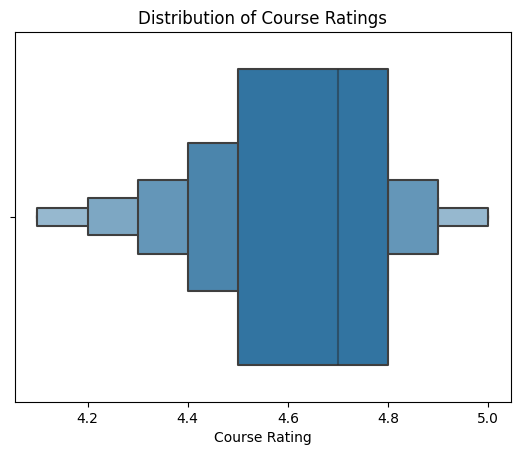

In [20]:
coursera_df['Course Rating'] = pd.to_numeric(coursera_df['Course Rating'])
sns.boxenplot(x=coursera_df['Course Rating'])
plt.title('Distribution of Course Ratings')
plt.show()

The plot shows us that the course rating is densely populated around the range of 4.5 to 4.8

C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\3044985165.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coursera_df['Course Rating'])


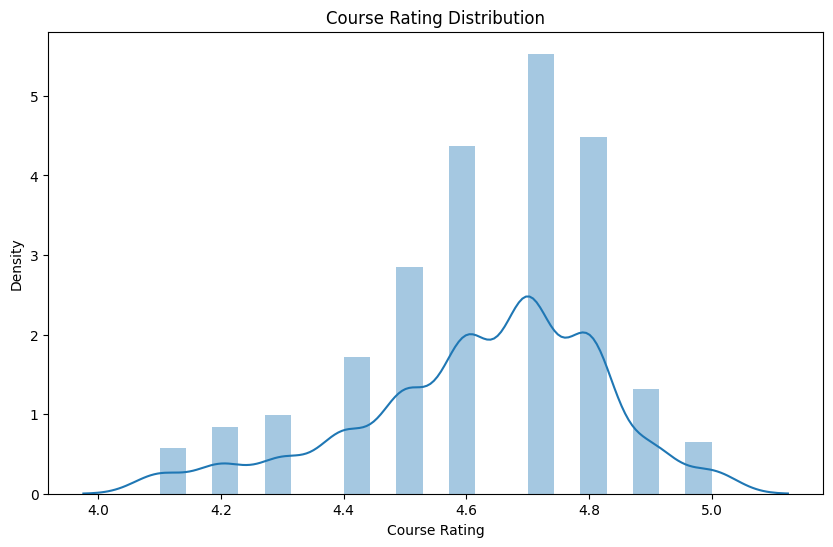

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(coursera_df['Course Rating'])
plt.title('Course Rating Distribution')
plt.show()

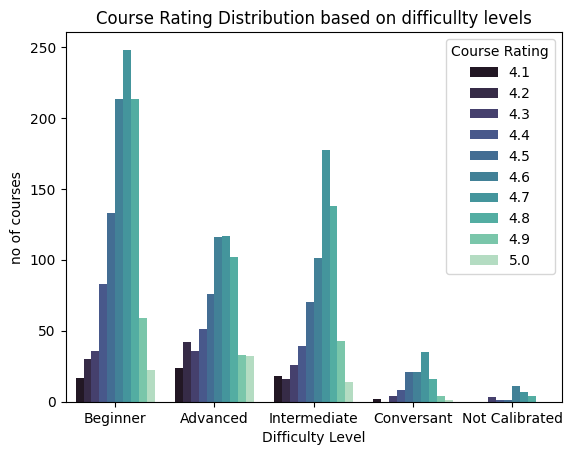

In [22]:
sns.countplot(x='Difficulty Level',hue='Course Rating',data=coursera_df,palette='mako')
plt.title('Course Rating Distribution based on difficullty levels')
plt.ylabel('no of courses')
plt.show()

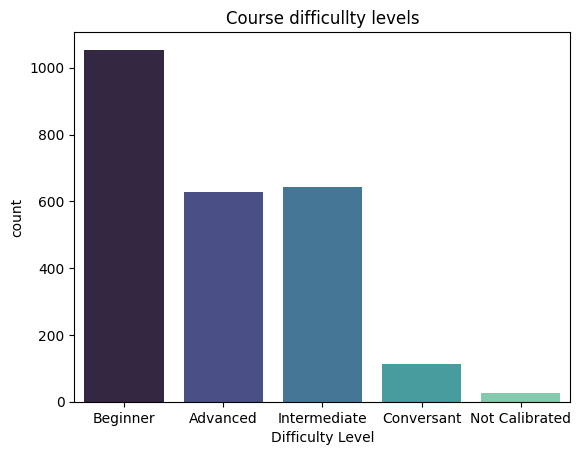

In [23]:
sns.countplot(x='Difficulty Level',data=coursera_df,palette='mako')
plt.title('Course difficullty levels')
plt.show()

We observe that most of the courses offered are of beginner difficulty level

In [24]:
coursera_df

,Course name,University,Difficulty Level,Course Rating,URL,Course Description,Skills,department
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Business
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Physical Science and Engineering
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Business
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Information Technology
...,...,...,...,...,...,...,...,...
2459,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...,Data Science
2460,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...,Arts and Humanities
2461,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...,Business
2462,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...,Physical Science and Engineering


In [25]:
udemy_df.isnull().sum()

Course name               0
department                0
is_paid                   0
price                     0
id                        0
url                       0
rating                    0
num_reviews               0
num_published_lectures    0
created                   0
last_update_date          6
duration                  0
instructors_id            0
image                     0
Content                   0
Topic                     0
Learning Objectives       3
dtype: int64

In [26]:
udemy_df[udemy_df.duplicated()]

,Course name,department,is_paid,price,id,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,Content,Topic,Learning Objectives
2,Healthy Cooking Fundamentals,Lifestyle,True,29.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
4,Healthy Cooking Fundamentals,Lifestyle,True,29.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
6,Healthy Cooking Fundamentals,Lifestyle,True,99.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
8,Healthy Cooking Fundamentals,Lifestyle,True,99.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
40,Kinetic Typography in After Effects: Motion Gr...,Design,True,29.99,709152,https://www.udemy.com/course/kinetic-typograph...,4.688697,1662,15,2015-12-29T00:11:42Z,06-08-2022,1.5 total hours,317821,https://img-c.udemycdn.com/course/750x422/7091...,Getting Started with the Course Kinetic Typogr...,Course Overview | Kinetic Typography in After ...,create stunning kinetic typography videos on t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,Adobe Illustrator CC MasterClass,Design,True,19.99,3207717,https://www.udemy.com/course/adobe-illustrator...,4.719643,2183,61,2020-06-05T20:02:07Z,23-10-2020,6.5 total hours,49423592,https://img-b.udemycdn.com/course/750x422/3207...,Introduction Basic tools Advanced tools Effect...,Introduction and program interface Selection t...,The interface of the program and shortcuts Sel...
3586,Registros Akashicos,Lifestyle,True,59.99,3477570,https://www.udemy.com/course/registros-akashicos/,4.639336,1124,42,2020-09-05T16:18:28Z,17-11-2022,27 total hours,131922576,https://img-c.udemycdn.com/course/750x422/3477...,Presentación Módulo 1 Módulo 2 Módulo 3 Módulo...,Presentación Introducción ¿Para qué registros?...,Nivel I - Nivel II y Emisión de Certificado pr...
3588,Registros Akashicos,Lifestyle,True,59.99,3671430,https://www.udemy.com/course/registros-akashic...,4.134590,4,5,2020-11-30T15:39:44Z,27-03-2021,33 total mins,129560038,https://img-c.udemycdn.com/course/750x422/3671...,Presentación Módulo 1 Módulo 2 Módulo 3 Módulo...,Presentación Introducción ¿Para qué registros?...,Nivel I - Nivel II y Emisión de Certificado pr...
3590,Registros Akashicos,Lifestyle,True,34.99,3477570,https://www.udemy.com/course/registros-akashicos/,4.639336,1124,42,2020-09-05T16:18:28Z,17-11-2022,27 total hours,131922576,https://img-c.udemycdn.com/course/750x422/3477...,Presentación Módulo 1 Módulo 2 Módulo 3 Módulo...,Presentación Introducción ¿Para qué registros?...,Nivel I - Nivel II y Emisión de Certificado pr...


In [27]:
udemy_df=udemy_df.drop_duplicates()
udemy_df=udemy_df.reset_index(drop=True)
udemy_df

,Course name,department,is_paid,price,id,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,Content,Topic,Learning Objectives
0,Javascript for Beginners,Development,True,19.99,8324,https://www.udemy.com/course/beginning-javascr...,4.347691,1650,70,2011-06-28T08:26:18Z,12-01-2023,7.5 total hours,11439,https://img-c.udemycdn.com/course/750x422/8324...,Bonus: Mark's JavaScript Workbook JavaScript 2...,JavaScript Development Workbook Output with Ja...,"Extensive, informative and interesting video l..."
1,Healthy Cooking Fundamentals,Lifestyle,True,29.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
2,Healthy Cooking Fundamentals,Lifestyle,True,29.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
3,Healthy Cooking Fundamentals,Lifestyle,True,99.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
4,Healthy Cooking Fundamentals,Lifestyle,True,99.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,ASP.NET Core 6.0 Course - MVC - Blazor - Razor...,Development,True,199.99,4599016,https://www.udemy.com/course/aspnet-6-course/,4.503602,1167,130,2022-03-16T09:29:16Z,08-09-2022,13.5 total hours,4573650,https://img-b.udemycdn.com/course/750x422/4599...,"ASP .Net Basics Prerequisites: HTML, CSS and B...",Welcome to the ASP.NET course! Intro to the ch...,Development of complete Web Applications using...
3569,Complete Cisco CCNA 200-301 Course,IT & Software,True,19.99,4599248,https://www.udemy.com/course/complete-cisco-cc...,4.774556,2327,120,2022-03-16T12:31:52Z,10-01-2023,40 total hours,48912750,https://img-c.udemycdn.com/course/750x422/4599...,Day 1 - Network Devices Getting help Day 2 - I...,Welcome to the Course! Lecture: Network Device...,This course will prepare you for the CCNA 200-...
3570,200 Hours Yoga Teacher Training - Part 1 (Yoga...,Health & Fitness,True,199.99,4638604,https://www.udemy.com/course/200-hours-yoga-te...,4.716651,1934,83,2022-04-12T06:50:00Z,04-01-2023,22 total hours,21674826,https://img-c.udemycdn.com/course/750x422/4638...,Introduction to the PART 1 of 200 Hrs Yoga Tea...,IMPORTANT Message by the Founders PLEASE Watch...,Ancient Yogic Philosophy (History and Origin) ...
3571,Problem Solving: The Complete Guide,Business,True,49.99,4651438,https://www.udemy.com/course/problem-solving-t...,4.585532,2000,34,2022-04-20T12:14:52Z,27-01-2023,1.5 total hours,34105812,https://img-c.udemycdn.com/course/750x422/4651...,Introduction Change your perception of problem...,Introduction The 4 phases of problem solving P...,Change your perception of problems and adopt t...


In [28]:
udemy_df.dtypes

Course name                object
department                 object
is_paid                      bool
price                     float64
id                          int64
url                        object
rating                    float64
num_reviews                 int64
num_published_lectures      int64
created                    object
last_update_date           object
duration                   object
instructors_id              int64
image                      object
Content                    object
Topic                      object
Learning Objectives        object
dtype: object

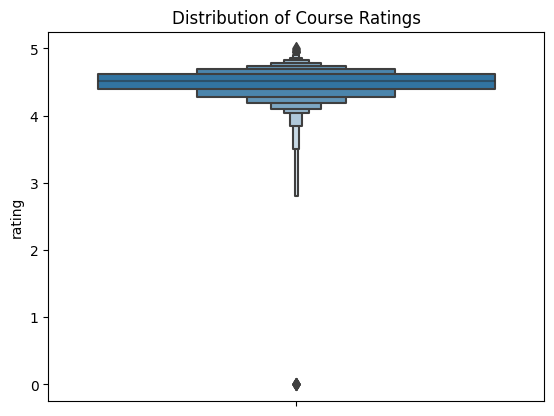

In [29]:
sns.boxenplot(y=udemy_df['rating'])
plt.title('Distribution of Course Ratings')
plt.show()

Courses are densely populated between a course rating of 4 and 5 and there are also a few outliers with rating to be zero

C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\3278344544.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(udemy_df['rating'])


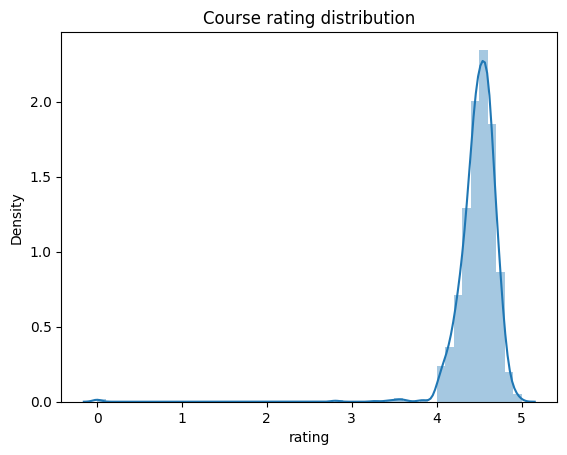

In [30]:
sns.distplot(udemy_df['rating'])
plt.title('Course rating distribution')
plt.show()


In [39]:
udemy_df

,Course name,department,is_paid,price,id,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,Content,Topic,Learning Objectives
0,Javascript for Beginners,Development,True,19.99,8324,https://www.udemy.com/course/beginning-javascr...,4.347691,1650,70,2011-06-28T08:26:18Z,12-01-2023,7.5 total hours,11439,https://img-c.udemycdn.com/course/750x422/8324...,Bonus: Mark's JavaScript Workbook JavaScript 2...,JavaScript Development Workbook Output with Ja...,"Extensive, informative and interesting video l..."
1,Healthy Cooking Fundamentals,Lifestyle,True,29.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
2,Healthy Cooking Fundamentals,Lifestyle,True,29.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
3,Healthy Cooking Fundamentals,Lifestyle,True,99.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
4,Healthy Cooking Fundamentals,Lifestyle,True,99.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,ASP.NET Core 6.0 Course - MVC - Blazor - Razor...,Development,True,199.99,4599016,https://www.udemy.com/course/aspnet-6-course/,4.503602,1167,130,2022-03-16T09:29:16Z,08-09-2022,13.5 total hours,4573650,https://img-b.udemycdn.com/course/750x422/4599...,"ASP .Net Basics Prerequisites: HTML, CSS and B...",Welcome to the ASP.NET course! Intro to the ch...,Development of complete Web Applications using...
3569,Complete Cisco CCNA 200-301 Course,IT & Software,True,19.99,4599248,https://www.udemy.com/course/complete-cisco-cc...,4.774556,2327,120,2022-03-16T12:31:52Z,10-01-2023,40 total hours,48912750,https://img-c.udemycdn.com/course/750x422/4599...,Day 1 - Network Devices Getting help Day 2 - I...,Welcome to the Course! Lecture: Network Device...,This course will prepare you for the CCNA 200-...
3570,200 Hours Yoga Teacher Training - Part 1 (Yoga...,Health & Fitness,True,199.99,4638604,https://www.udemy.com/course/200-hours-yoga-te...,4.716651,1934,83,2022-04-12T06:50:00Z,04-01-2023,22 total hours,21674826,https://img-c.udemycdn.com/course/750x422/4638...,Introduction to the PART 1 of 200 Hrs Yoga Tea...,IMPORTANT Message by the Founders PLEASE Watch...,Ancient Yogic Philosophy (History and Origin) ...
3571,Problem Solving: The Complete Guide,Business,True,49.99,4651438,https://www.udemy.com/course/problem-solving-t...,4.585532,2000,34,2022-04-20T12:14:52Z,27-01-2023,1.5 total hours,34105812,https://img-c.udemycdn.com/course/750x422/4651...,Introduction Change your perception of problem...,Introduction The 4 phases of problem solving P...,Change your perception of problems and adopt t...


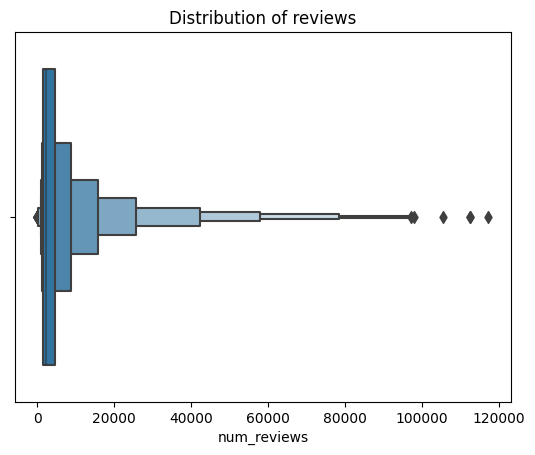

In [58]:
sns.boxenplot(x=udemy_df[udemy_df['num_reviews']<125000]['num_reviews'])
plt.title('Distribution of reviews')
plt.show()

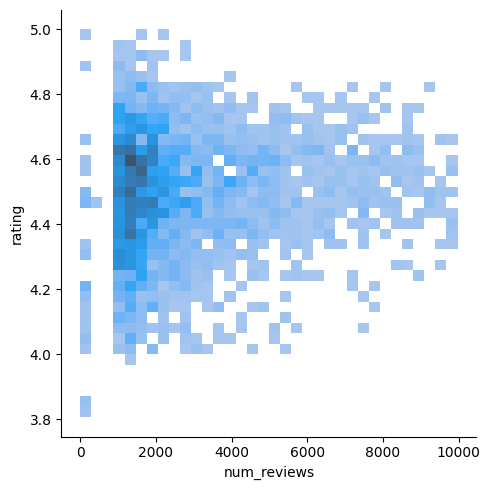

In [59]:
sns.displot(data=udemy_df,x=udemy_df[udemy_df['num_reviews']<10000]['num_reviews'],y=udemy_df[udemy_df['rating']>3.75]['rating'])
plt.show()

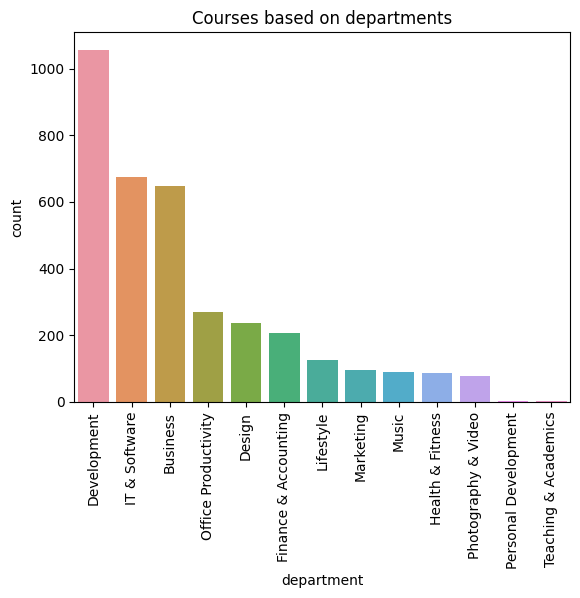

In [60]:
order=udemy_df['department'].value_counts().index
sns.countplot(x=udemy_df['department'],order=order)
plt.xticks(rotation='vertical')
plt.title('Courses based on departments')
plt.show()

In [61]:
mit_df

,Course name,Description,Topics,Instructors,URL,Department
0,Introduction to Computers and Engineering Prob...,This course presents the fundamentals of objec...,"Engineering, Computer Science, Programming Lan...",Dr. George Kocur Dr. Christopher Cassa Prof. M...,https://ocw.mit.edu/courses/1-00-introduction-...,Civil and Environmental Engineering
1,Uncertainty in Engineering,This course gives an introduction to probabili...,"Engineering, Civil Engineering, Mathematics",Prof. Daniele Veneziano,https://ocw.mit.edu/courses/1-010-uncertainty-...,Civil and Environmental Engineering
2,Project Evaluation,1.011 Project Evaluation covers methodologies ...,"Business, Project Management, Engineering, Soc...",Prof. Joseph Sussman Carl D. Martland,https://ocw.mit.edu/courses/1-011-project-eval...,Civil and Environmental Engineering
3,Introduction to Civil Engineering Design,"1.012 introduces students to the theory, tools...","Engineering, Civil Engineering, Construction M...",Prof. Herbert Einstein,https://ocw.mit.edu/courses/1-012-introduction...,Civil and Environmental Engineering
4,Computing and Data Analysis for Environmental ...,This subject is a computer-oriented introducti...,"Engineering, Computer Science, Data Mining, En...",Prof. Dennis McLaughlin,https://ocw.mit.edu/courses/1-017-computing-an...,Civil and Environmental Engineering
...,...,...,...,...,...,...
2265,System Dynamics: Systems Thinking and Modeling...,This one-day workshop provides a brief overvie...,"Business, Management, Operations Management, O...",James E. Paine,https://ocw.mit.edu/courses/res-15-004-system-...,Supplemental Resources
2266,Healthcare Finance (15.482x),Healthcare Finance (15.482x) provides students...,"Business, Finance, Health Care Management, Man...",Prof. Andrew Lo,https://ocw.mit.edu/courses/res-15-005-healthc...,Supplemental Resources\nSloan School of Manage...
2267,Lean Enterprise en Español,Este curso contiene un subconjunto de material...,"Business, Health Care Management, Leadership, ...",Earll Murman Hugh McManus Luis Fernando Alarcó...,https://ocw.mit.edu/courses/res-16-001-lean-en...,Supplemental Resources
2268,MIT Election Data + Science Lab,The MIT Election Data and Science Lab (MEDSL) ...,"Social Science, Political Science, American Po...",MIT Election Lab,https://ocw.mit.edu/courses/res-17-001-mit-ele...,Supplemental Resources


In [63]:
mit_df[mit_df.duplicated()]

,Course name,Description,Topics,Instructors,URL,Department


In [64]:
mit_df.isnull().sum()

Course name    0
Description    0
Topics         2
Instructors    1
URL            0
Department     0
dtype: int64

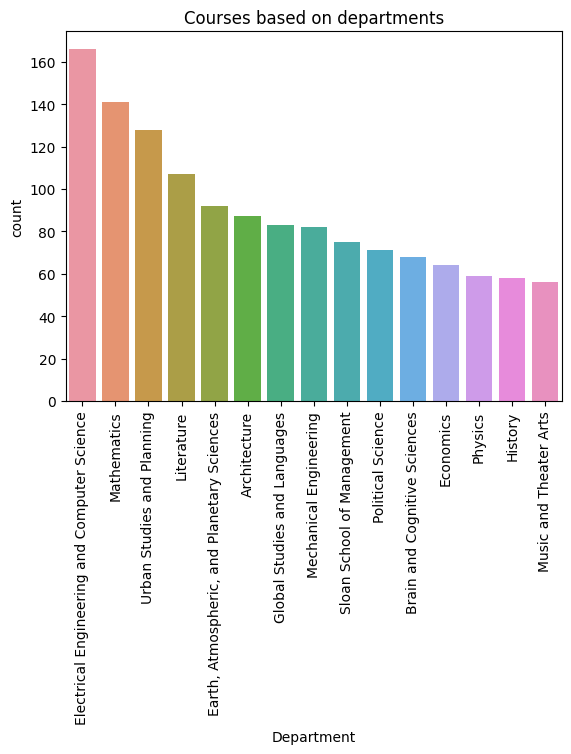

In [65]:
order=mit_df['Department'].value_counts().index[0:15]
sns.countplot(x=mit_df['Department'],order=order)
plt.xticks(rotation='vertical')
plt.title('Courses based on departments')
plt.show()

In [66]:
nptel_df=nptel_df[['Course_name', 'Discipline', 'Teaching', 'Institute',
       'course_id', 'Course URL', 'Course abstract', 'Course units',
       'Course lessons']]
nptel_df

,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons
0,Introduction To Aerospace Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101001,https://nptel.ac.in/courses/101101001,,Introduction to Aerospace Propulsion,L1-Course Intro & Historical development of fl...
1,Jet Aircraft Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101002,https://nptel.ac.in/courses/101101002,,Jet Aircraft Propulsion,L1-Introduction & Development of Jet Aircraft ...
2,Turbomachinery Aerodynamics,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101058,https://nptel.ac.in/courses/101101058,,Turbomachinery Aerodynamics,"L1-Introduction to Turbo machines Syllabus, Re..."
3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101079,https://nptel.ac.in/courses/101101079,Course Abstract The aim of this course is to p...,Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Lecture 1 : Course Layout and Brief Introducti...
4,NOC:Introduction To Aircraft Design,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101083,https://nptel.ac.in/courses/101101083,Course Abstract This course is designed to pro...,Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Lecture 1 : What is Aircraft Design Lecture 2 ...
...,...,...,...,...,...,...,...,...,...
2575,NOC:Introduction To Econometrics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106001,https://nptel.ac.in/courses/130106001,"Course Abstract As the name suggests, the subj...",Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Introduction to econometrics and econometric a...
2576,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106113,https://nptel.ac.in/courses/130106113,Course Abstract This course is designed to gui...,NaN,NaN
2577,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi,130106115,https://nptel.ac.in/courses/130106115,Course Abstract The purpose of this course is ...,week-01 week-02 week-03 week-04 week-05 week-0...,Introduction to Spatial Data Analysis Spatial ...
2578,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore,130106117,https://nptel.ac.in/courses/130106117,Course Abstract The rapid innovation in the mo...,week-01 week-02 week-03 week-04 week-05 week-0...,Introduction Stylized facts of Innovation Inno...


In [67]:
nptel_df.isnull().sum()

Course_name         0
Discipline          0
Teaching           32
Institute          11
course_id           0
Course URL          0
Course abstract     0
Course units       16
Course lessons     16
dtype: int64

In [68]:
nptel_df[nptel_df.duplicated()]

,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons


In [69]:
nptel_df=nptel_df.drop_duplicates(subset='Course_name')
nptel_df=nptel_df.reset_index(drop=True)
nptel_df

,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons
0,Introduction To Aerospace Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101001,https://nptel.ac.in/courses/101101001,,Introduction to Aerospace Propulsion,L1-Course Intro & Historical development of fl...
1,Jet Aircraft Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101002,https://nptel.ac.in/courses/101101002,,Jet Aircraft Propulsion,L1-Introduction & Development of Jet Aircraft ...
2,Turbomachinery Aerodynamics,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101058,https://nptel.ac.in/courses/101101058,,Turbomachinery Aerodynamics,"L1-Introduction to Turbo machines Syllabus, Re..."
3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101079,https://nptel.ac.in/courses/101101079,Course Abstract The aim of this course is to p...,Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Lecture 1 : Course Layout and Brief Introducti...
4,NOC:Introduction To Aircraft Design,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101083,https://nptel.ac.in/courses/101101083,Course Abstract This course is designed to pro...,Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Lecture 1 : What is Aircraft Design Lecture 2 ...
...,...,...,...,...,...,...,...,...,...
2575,NOC:Introduction To Econometrics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106001,https://nptel.ac.in/courses/130106001,"Course Abstract As the name suggests, the subj...",Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Introduction to econometrics and econometric a...
2576,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106113,https://nptel.ac.in/courses/130106113,Course Abstract This course is designed to gui...,NaN,NaN
2577,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi,130106115,https://nptel.ac.in/courses/130106115,Course Abstract The purpose of this course is ...,week-01 week-02 week-03 week-04 week-05 week-0...,Introduction to Spatial Data Analysis Spatial ...
2578,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore,130106117,https://nptel.ac.in/courses/130106117,Course Abstract The rapid innovation in the mo...,week-01 week-02 week-03 week-04 week-05 week-0...,Introduction Stylized facts of Innovation Inno...


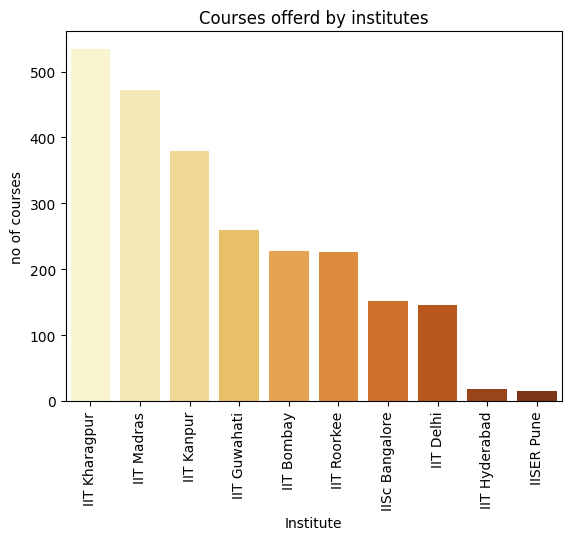

In [70]:
order=nptel_df['Institute'].value_counts().index[0:10]
sns.countplot(data=nptel_df,x=nptel_df['Institute'],order=order,palette='YlOrBr')
plt.xticks(rotation='vertical')
plt.ylabel('no of courses')
plt.title('Courses offerd by institutes')
plt.show()

Majority of the courses are from the IIT Kharagpur, IIT Madras and IIT Kanpur 

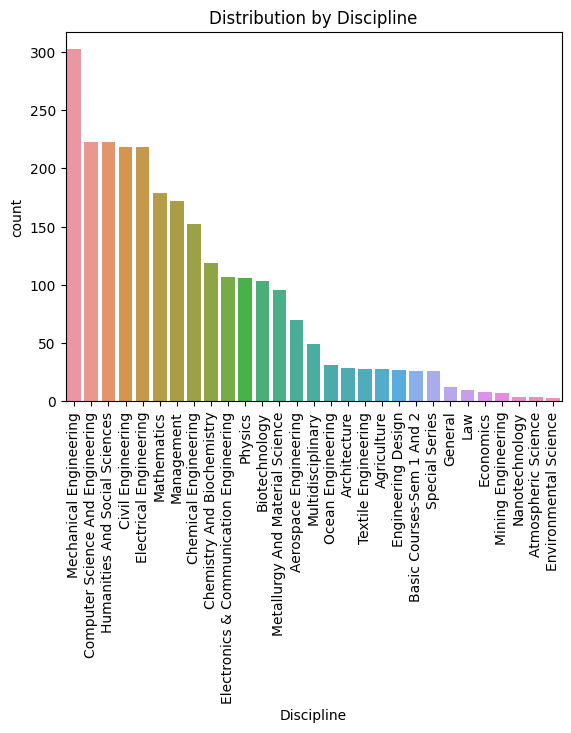

In [71]:
order=nptel_df['Discipline'].value_counts().index
sns.countplot(data=nptel_df,x=nptel_df['Discipline'],order=order)
plt.title('Distribution by Discipline')
plt.xticks(rotation='vertical')
plt.show()

### Data Cleaning

our main motive is to get data which includes contents means important words specific to the course for that we will need to exclude words which are not specific to the course

In [72]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [73]:
nptel_df['Course abstract']=nptel_df['Course abstract'].str.replace('^Course Abstract','',regex=True)
nptel_df

,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons
0,Introduction To Aerospace Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101001,https://nptel.ac.in/courses/101101001,,Introduction to Aerospace Propulsion,L1-Course Intro & Historical development of fl...
1,Jet Aircraft Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101002,https://nptel.ac.in/courses/101101002,,Jet Aircraft Propulsion,L1-Introduction & Development of Jet Aircraft ...
2,Turbomachinery Aerodynamics,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101058,https://nptel.ac.in/courses/101101058,,Turbomachinery Aerodynamics,"L1-Introduction to Turbo machines Syllabus, Re..."
3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101079,https://nptel.ac.in/courses/101101079,The aim of this course is to provide a genera...,Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Lecture 1 : Course Layout and Brief Introducti...
4,NOC:Introduction To Aircraft Design,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101083,https://nptel.ac.in/courses/101101083,This course is designed to provide students a...,Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Lecture 1 : What is Aircraft Design Lecture 2 ...
...,...,...,...,...,...,...,...,...,...
2575,NOC:Introduction To Econometrics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106001,https://nptel.ac.in/courses/130106001,"As the name suggests, the subject econometric...",Week 1 Week 2 Week 3 Week 4 Week 5 Week 6 Week...,Introduction to econometrics and econometric a...
2576,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106113,https://nptel.ac.in/courses/130106113,This course is designed to guide students thr...,NaN,NaN
2577,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi,130106115,https://nptel.ac.in/courses/130106115,The purpose of this course is to introduce th...,week-01 week-02 week-03 week-04 week-05 week-0...,Introduction to Spatial Data Analysis Spatial ...
2578,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore,130106117,https://nptel.ac.in/courses/130106117,The rapid innovation in the modern economy ha...,week-01 week-02 week-03 week-04 week-05 week-0...,Introduction Stylized facts of Innovation Inno...


In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eashw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    cleaned_text=re.sub(r'[^a-zA-Z\s]','',text)
    words=word_tokenize(cleaned_text)
    words=[word.lower() for word in  words if not word.isnumeric() and word not in stop_words]
    return ' '.join(words)

In [76]:
nptel_df.dtypes

Course_name        object
Discipline         object
Teaching           object
Institute          object
course_id           int64
Course URL         object
Course abstract    object
Course units       object
Course lessons     object
dtype: object

In [77]:
nptel_df['Course units'].fillna(' ',inplace=True)
nptel_df['Course abstract'].fillna(' ',inplace=True)
nptel_df['Course lessons'].fillna(' ',inplace=True)

In [78]:
nptel_df['Course units']=nptel_df['Course units'].apply(remove_stopwords)
nptel_df['Course abstract']=nptel_df['Course abstract'].apply(remove_stopwords)
nptel_df['Course lessons']=nptel_df['Course lessons'].apply(remove_stopwords)
nptel_df

,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons
0,Introduction To Aerospace Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101001,https://nptel.ac.in/courses/101101001,,introduction aerospace propulsion,lcourse intro historical development flights l...
1,Jet Aircraft Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101002,https://nptel.ac.in/courses/101101002,,jet aircraft propulsion,lintroduction development jet aircraft propuls...
2,Turbomachinery Aerodynamics,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101058,https://nptel.ac.in/courses/101101058,,turbomachinery aerodynamics,lintroduction turbo machines syllabus referenc...
3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101079,https://nptel.ac.in/courses/101101079,the aim course provide general overview field ...,week week week week week week week week week w...,lecture course layout brief introduction cours...
4,NOC:Introduction To Aircraft Design,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101083,https://nptel.ac.in/courses/101101083,this course designed provide students understa...,week week week week week week week week week w...,lecture what aircraft design lecture phases ai...
...,...,...,...,...,...,...,...,...,...
2575,NOC:Introduction To Econometrics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106001,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics aims mea...,week week week week week week week week week w...,introduction econometrics econometric analysis...
2576,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106113,https://nptel.ac.in/courses/130106113,this course designed guide students frontier a...,,
2577,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi,130106115,https://nptel.ac.in/courses/130106115,the purpose course introduce analytical framew...,week week week week week week week week week w...,introduction spatial data analysis spatial pat...
2578,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore,130106117,https://nptel.ac.in/courses/130106117,the rapid innovation modern economy increased ...,week week week week week week week week week w...,introduction stylized facts innovation innovat...


In [79]:
Counter(' '.join(nptel_df['Course abstract']).split())

Counter({'course': 3567,
         'the': 2095,
         'this': 1314,
         'students': 1055,
         'design': 782,
         'also': 724,
         'engineering': 684,
         'systems': 579,
         'basic': 573,
         'various': 565,
         'applications': 536,
         'analysis': 516,
         'concepts': 511,
         'it': 505,
         'understanding': 472,
         'techniques': 432,
         'in': 419,
         'different': 408,
         'theory': 365,
         'system': 338,
         'understand': 335,
         'problems': 332,
         'discussed': 325,
         'processes': 324,
         'methods': 321,
         'knowledge': 319,
         'important': 311,
         'process': 311,
         'data': 311,
         'management': 309,
         'well': 299,
         'materials': 291,
         'used': 280,
         'development': 279,
         'etc': 278,
         'provide': 276,
         'principles': 276,
         'research': 276,
         'aspects': 274,
         'le

In [80]:
words_to_remove={'course','this','the','learn','in','you','use','learning','use','also','using','we','able','youll','understanding','well','learners','skills','experience','create','new','help','understand','based','end','one','part','used','make','it','build','students','concepts','best','need','by','including','many','courses','get','explore','practice','important','complete','week','like','provide','us','problems','want','what','topics','how','i','a','two','take','module','works','providing','way','note','questions','introduction','were','challenges','if','for','see','within','discuss','discussed','process','etc','introduce','would','cover','examples','covered','objective','aims','along','provides','introduces','covers','problem','to','include','overview'}
def remove_words(text):
    return ' '.join(word for word in text.split() if word not in words_to_remove)
nptel_df['Course abstract']=nptel_df['Course abstract'].apply(remove_words)
nptel_df

,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons
0,Introduction To Aerospace Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101001,https://nptel.ac.in/courses/101101001,,introduction aerospace propulsion,lcourse intro historical development flights l...
1,Jet Aircraft Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101002,https://nptel.ac.in/courses/101101002,,jet aircraft propulsion,lintroduction development jet aircraft propuls...
2,Turbomachinery Aerodynamics,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101058,https://nptel.ac.in/courses/101101058,,turbomachinery aerodynamics,lintroduction turbo machines syllabus referenc...
3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101079,https://nptel.ac.in/courses/101101079,aim general field aeronautical engineering int...,week week week week week week week week week w...,lecture course layout brief introduction cours...
4,NOC:Introduction To Aircraft Design,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101083,https://nptel.ac.in/courses/101101083,designed procedure followed conceptual design ...,week week week week week week week week week w...,lecture what aircraft design lecture phases ai...
...,...,...,...,...,...,...,...,...,...
2575,NOC:Introduction To Econometrics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106001,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,week week week week week week week week week w...,introduction econometrics econometric analysis...
2576,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106113,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,,
2577,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi,130106115,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,week week week week week week week week week w...,introduction spatial data analysis spatial pat...
2578,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore,130106117,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,week week week week week week week week week w...,introduction stylized facts innovation innovat...


In [81]:
Counter(' '.join(nptel_df['Course units']).split())

Counter({'week': 13006,
         'module': 2095,
         'unit': 1361,
         'session': 796,
         'live': 791,
         'introduction': 578,
         'analysis': 285,
         'design': 265,
         'ii': 231,
         'systems': 217,
         'i': 170,
         'contd': 169,
         'theory': 162,
         'methods': 151,
         'system': 151,
         'linear': 132,
         'applications': 131,
         'properties': 130,
         'control': 130,
         'part': 125,
         'lecture': 123,
         'management': 116,
         'processes': 115,
         'equations': 114,
         'the': 110,
         'flow': 105,
         'basic': 103,
         'techniques': 96,
         'data': 90,
         'process': 88,
         'model': 83,
         'basics': 82,
         'iii': 81,
         'method': 80,
         'processing': 79,
         'concepts': 78,
         'application': 75,
         'power': 72,
         'materials': 72,
         'programming': 72,
         'functions': 7

In [82]:
words_to_remove={'course','this','the','learn','in','you','use','learning','use','also','using','we','able','youll',
                 'understanding','well','learners','skills','experience','create','new','help','understand','based'
                 ,'end','one','part','used','make','it','build','students','concepts','best','need','by','including',
                 'many','courses','get','explore','practice','important','complete','week','like','provide',
                 'us','problems','want','what','topics','how','i','a','two','take','module','works','providing',
                 'way','note','questions','introduction','were','challenges','if','for','see','within','discuss',
                 'discussed','process','etc','introduce','would','cover','examples','covered','objective',
                 'aims','along','provides','introduces','covers','problem','to','include','overview','ii','unit',
                 'session','live','contd','lecture','iii','lectures','and','of','chapter','review','case','iv','d','evaluation'
                 'solving',''}
def remove_words(text):
    return ' '.join(word for word in text.split() if word not in words_to_remove)
nptel_df['Course units']=nptel_df['Course units'].apply(remove_words)
nptel_df

,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons
0,Introduction To Aerospace Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101001,https://nptel.ac.in/courses/101101001,,aerospace propulsion,lcourse intro historical development flights l...
1,Jet Aircraft Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101002,https://nptel.ac.in/courses/101101002,,jet aircraft propulsion,lintroduction development jet aircraft propuls...
2,Turbomachinery Aerodynamics,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101058,https://nptel.ac.in/courses/101101058,,turbomachinery aerodynamics,lintroduction turbo machines syllabus referenc...
3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101079,https://nptel.ac.in/courses/101101079,aim general field aeronautical engineering int...,,lecture course layout brief introduction cours...
4,NOC:Introduction To Aircraft Design,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101083,https://nptel.ac.in/courses/101101083,designed procedure followed conceptual design ...,,lecture what aircraft design lecture phases ai...
...,...,...,...,...,...,...,...,...,...
2575,NOC:Introduction To Econometrics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106001,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,,introduction econometrics econometric analysis...
2576,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106113,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,,
2577,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi,130106115,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,,introduction spatial data analysis spatial pat...
2578,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore,130106117,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,,introduction stylized facts innovation innovat...


In [83]:
Counter(' '.join(nptel_df['Course lessons']).split())

Counter({'lecture': 51709,
         'part': 11903,
         'lec': 8298,
         'introduction': 7780,
         'contd': 7103,
         'ii': 4519,
         'i': 4467,
         'analysis': 4080,
         'design': 3380,
         'the': 2663,
         'week': 2504,
         'session': 2439,
         'system': 2220,
         'live': 2055,
         'systems': 2032,
         'flow': 1738,
         'theory': 1737,
         'iii': 1672,
         'properties': 1659,
         'method': 1648,
         'linear': 1632,
         'module': 1578,
         'model': 1557,
         'energy': 1436,
         'equation': 1382,
         'control': 1381,
         'management': 1370,
         'methods': 1356,
         'problem': 1310,
         'basic': 1298,
         'process': 1280,
         'equations': 1270,
         'examples': 1252,
         'data': 1242,
         'using': 1213,
         'a': 1189,
         'continued': 1188,
         'problems': 1168,
         'theorem': 1154,
         'applications':

In [84]:
words_to_remove={'course','this','the','learn','in','you','use','learning','use','also','using','we','able','youll',
                 'understanding','well','learners','skills','experience','create','new','help','understand','based'
                 ,'end','one','part','used','make','it','build','students','concepts','best','need','by','including',
                 'many','courses','get','explore','practice','important','complete','week','like','provide',
                 'us','problems','want','what','topics','how','i','a','two','take','module','works','providing',
                 'way','note','questions','lec','introduction','were','challenges','if','for','see','within','discuss',
                 'discussed','process','etc','introduce','would','cover','examples','covered','objective',
                 'aims','along','provides','introduces','covers','problem','to','include','overview','ii','unit',
                 'session','live','contd','lecture','iii','lectures','and','of','chapter','review','case','iv','d','evaluation'
                 'solving','continued','example'}
def remove_words(text):
    return ' '.join(word for word in text.split() if word not in words_to_remove)
nptel_df['Course lessons']=nptel_df['Course lessons'].apply(remove_words)
nptel_df

,Course_name,Discipline,Teaching,Institute,course_id,Course URL,Course abstract,Course units,Course lessons
0,Introduction To Aerospace Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101001,https://nptel.ac.in/courses/101101001,,aerospace propulsion,lcourse intro historical development flights l...
1,Jet Aircraft Propulsion,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101002,https://nptel.ac.in/courses/101101002,,jet aircraft propulsion,lintroduction development jet aircraft propuls...
2,Turbomachinery Aerodynamics,Aerospace Engineering,"Prof. Bhaskar Roy, Prof. A M Pradeep",IIT Bombay,101101058,https://nptel.ac.in/courses/101101058,,turbomachinery aerodynamics,lintroduction turbo machines syllabus referenc...
3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101079,https://nptel.ac.in/courses/101101079,aim general field aeronautical engineering int...,,layout brief instructor international standard...
4,NOC:Introduction To Aircraft Design,Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,101101083,https://nptel.ac.in/courses/101101083,designed procedure followed conceptual design ...,,aircraft design phases aircraft design design ...
...,...,...,...,...,...,...,...,...,...
2575,NOC:Introduction To Econometrics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106001,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,,econometrics econometric analysis econometrics...
2576,NOC:Environmental & Resource Economics,Economics,Prof. Sabuj Kumar Mandal,IIT Madras,130106113,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,,
2577,NOC:Spatial Statistics And Spatial Econometrics,Economics,Prof .Gaurav Arora,IIIT Delhi,130106115,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,,spatial data analysis spatial patters data gen...
2578,NOC:Economics Of Innovation,Economics,Prof. Ruchi Sharma,IIT Indore,130106117,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,,stylized facts innovation innovation history e...


In [85]:
mit_df

,Course name,Description,Topics,Instructors,URL,Department
0,Introduction to Computers and Engineering Prob...,This course presents the fundamentals of objec...,"Engineering, Computer Science, Programming Lan...",Dr. George Kocur Dr. Christopher Cassa Prof. M...,https://ocw.mit.edu/courses/1-00-introduction-...,Civil and Environmental Engineering
1,Uncertainty in Engineering,This course gives an introduction to probabili...,"Engineering, Civil Engineering, Mathematics",Prof. Daniele Veneziano,https://ocw.mit.edu/courses/1-010-uncertainty-...,Civil and Environmental Engineering
2,Project Evaluation,1.011 Project Evaluation covers methodologies ...,"Business, Project Management, Engineering, Soc...",Prof. Joseph Sussman Carl D. Martland,https://ocw.mit.edu/courses/1-011-project-eval...,Civil and Environmental Engineering
3,Introduction to Civil Engineering Design,"1.012 introduces students to the theory, tools...","Engineering, Civil Engineering, Construction M...",Prof. Herbert Einstein,https://ocw.mit.edu/courses/1-012-introduction...,Civil and Environmental Engineering
4,Computing and Data Analysis for Environmental ...,This subject is a computer-oriented introducti...,"Engineering, Computer Science, Data Mining, En...",Prof. Dennis McLaughlin,https://ocw.mit.edu/courses/1-017-computing-an...,Civil and Environmental Engineering
...,...,...,...,...,...,...
2265,System Dynamics: Systems Thinking and Modeling...,This one-day workshop provides a brief overvie...,"Business, Management, Operations Management, O...",James E. Paine,https://ocw.mit.edu/courses/res-15-004-system-...,Supplemental Resources
2266,Healthcare Finance (15.482x),Healthcare Finance (15.482x) provides students...,"Business, Finance, Health Care Management, Man...",Prof. Andrew Lo,https://ocw.mit.edu/courses/res-15-005-healthc...,Supplemental Resources\nSloan School of Manage...
2267,Lean Enterprise en Español,Este curso contiene un subconjunto de material...,"Business, Health Care Management, Leadership, ...",Earll Murman Hugh McManus Luis Fernando Alarcó...,https://ocw.mit.edu/courses/res-16-001-lean-en...,Supplemental Resources
2268,MIT Election Data + Science Lab,The MIT Election Data and Science Lab (MEDSL) ...,"Social Science, Political Science, American Po...",MIT Election Lab,https://ocw.mit.edu/courses/res-17-001-mit-ele...,Supplemental Resources


In [86]:
mit_df['Description']=mit_df['Description'].apply(remove_stopwords)
mit_df['Topics']=mit_df['Topics'].str.replace(',',' ').str.lower()
mit_df

,Course name,Description,Topics,Instructors,URL,Department
0,Introduction to Computers and Engineering Prob...,this course presents fundamentals objectorient...,engineering computer science programming lan...,Dr. George Kocur Dr. Christopher Cassa Prof. M...,https://ocw.mit.edu/courses/1-00-introduction-...,Civil and Environmental Engineering
1,Uncertainty in Engineering,this course gives introduction probability sta...,engineering civil engineering mathematics,Prof. Daniele Veneziano,https://ocw.mit.edu/courses/1-010-uncertainty-...,Civil and Environmental Engineering
2,Project Evaluation,project evaluation covers methodologies evalua...,business project management engineering soc...,Prof. Joseph Sussman Carl D. Martland,https://ocw.mit.edu/courses/1-011-project-eval...,Civil and Environmental Engineering
3,Introduction to Civil Engineering Design,introduces students theory tools techniques en...,engineering civil engineering construction m...,Prof. Herbert Einstein,https://ocw.mit.edu/courses/1-012-introduction...,Civil and Environmental Engineering
4,Computing and Data Analysis for Environmental ...,this subject computeroriented introduction pro...,engineering computer science data mining en...,Prof. Dennis McLaughlin,https://ocw.mit.edu/courses/1-017-computing-an...,Civil and Environmental Engineering
...,...,...,...,...,...,...
2265,System Dynamics: Systems Thinking and Modeling...,this oneday workshop provides brief overview s...,business management operations management o...,James E. Paine,https://ocw.mit.edu/courses/res-15-004-system-...,Supplemental Resources
2266,Healthcare Finance (15.482x),healthcare finance x provides students backgro...,business finance health care management man...,Prof. Andrew Lo,https://ocw.mit.edu/courses/res-15-005-healthc...,Supplemental Resources\nSloan School of Manage...
2267,Lean Enterprise en Español,este curso contiene un subconjunto de material...,business health care management leadership ...,Earll Murman Hugh McManus Luis Fernando Alarcó...,https://ocw.mit.edu/courses/res-16-001-lean-en...,Supplemental Resources
2268,MIT Election Data + Science Lab,the mit election data science lab medsl suppor...,social science political science american po...,MIT Election Lab,https://ocw.mit.edu/courses/res-17-001-mit-ele...,Supplemental Resources


In [87]:
Counter(' '.join(mit_df['Description']).split())

Counter({'course': 2211,
         'this': 1791,
         'less': 1502,
         'the': 1110,
         'students': 1005,
         'design': 703,
         'topics': 666,
         'include': 606,
         'systems': 604,
         'theory': 485,
         'class': 480,
         'it': 470,
         'analysis': 417,
         'introduction': 386,
         'also': 373,
         'engineering': 364,
         'methods': 352,
         'including': 351,
         'development': 319,
         'social': 312,
         'techniques': 294,
         'applications': 287,
         'research': 286,
         'well': 279,
         'issues': 263,
         'focus': 263,
         'we': 262,
         'in': 262,
         'covers': 261,
         'science': 258,
         'models': 252,
         'problems': 248,
         'subject': 242,
         'study': 239,
         'emphasis': 234,
         'basic': 234,
         'political': 233,
         'provides': 231,
         'new': 226,
         'economic': 223,
         'work

In [88]:
words_to_remove={'course','this','the','learn','in','you','use','learning','use','also','using','we','able','youll',
                 'understanding','well','learners','skills','experience','create','new','help','understand','based'
                 ,'end','one','part','used','make','it','build','students','concepts','best','need','by','including',
                 'many','courses','get','explore','practice','important','complete','week','like','provide',
                 'us','problems','want','what','topics','how','i','a','two','take','module','works','providing',
                 'way','note','questions','lec','introduction','were','challenges','if','for','see','within','discuss',
                 'discussed','process','etc','introduce','would','cover','examples','covered','objective',
                 'aims','along','provides','introduces','covers','problem','to','include','overview','ii','unit',
                 'session','live','contd','lecture','iii','lectures','and','of','chapter','review','case','iv','d','evaluation'
                 'solving','continued','example','less','issues','focus','examines','explores','seminar','focuses',
                 'project','processes','policy','first','discussion'}
def remove_words(text):
    return ' '.join(word for word in text.split() if word not in words_to_remove)
mit_df['Description']=mit_df['Description'].apply(remove_words)
mit_df

,Course name,Description,Topics,Instructors,URL,Department
0,Introduction to Computers and Engineering Prob...,presents fundamentals objectoriented software ...,engineering computer science programming lan...,Dr. George Kocur Dr. Christopher Cassa Prof. M...,https://ocw.mit.edu/courses/1-00-introduction-...,Civil and Environmental Engineering
1,Uncertainty in Engineering,gives probability statistics emphasis engineer...,engineering civil engineering mathematics,Prof. Daniele Veneziano,https://ocw.mit.edu/courses/1-010-uncertainty-...,Civil and Environmental Engineering
2,Project Evaluation,evaluation methodologies evaluating civil engi...,business project management engineering soc...,Prof. Joseph Sussman Carl D. Martland,https://ocw.mit.edu/courses/1-011-project-eval...,Civil and Environmental Engineering
3,Introduction to Civil Engineering Design,theory tools techniques engineering design cre...,engineering civil engineering construction m...,Prof. Herbert Einstein,https://ocw.mit.edu/courses/1-012-introduction...,Civil and Environmental Engineering
4,Computing and Data Analysis for Environmental ...,subject computeroriented probability data anal...,engineering computer science data mining en...,Prof. Dennis McLaughlin,https://ocw.mit.edu/courses/1-017-computing-an...,Civil and Environmental Engineering
...,...,...,...,...,...,...
2265,System Dynamics: Systems Thinking and Modeling...,oneday workshop brief system dynamics handson ...,business management operations management o...,James E. Paine,https://ocw.mit.edu/courses/res-15-004-system-...,Supplemental Resources
2266,Healthcare Finance (15.482x),healthcare finance x background resources fram...,business finance health care management man...,Prof. Andrew Lo,https://ocw.mit.edu/courses/res-15-005-healthc...,Supplemental Resources\nSloan School of Manage...
2267,Lean Enterprise en Español,este curso contiene un subconjunto de material...,business health care management leadership ...,Earll Murman Hugh McManus Luis Fernando Alarcó...,https://ocw.mit.edu/courses/res-16-001-lean-en...,Supplemental Resources
2268,MIT Election Data + Science Lab,mit election data science lab medsl supports a...,social science political science american po...,MIT Election Lab,https://ocw.mit.edu/courses/res-17-001-mit-ele...,Supplemental Resources


In [89]:
coursera_df

,Course name,University,Difficulty Level,Course Rating,URL,Course Description,Skills,department
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Business
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Physical Science and Engineering
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Business
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Information Technology
...,...,...,...,...,...,...,...,...
2459,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...,Data Science
2460,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...,Arts and Humanities
2461,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...,Business
2462,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...,Physical Science and Engineering


In [90]:
coursera_df['Course Description']=coursera_df['Course Description'].apply(remove_stopwords)
coursera_df['Skills']=coursera_df['Skills'].str.lower()
coursera_df

,Course name,University,Difficulty Level,Course Rating,URL,Course Description,Skills,department
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write full length feature film script in cours...,drama comedy peering screenwriting film d...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,by end guided project fluent identifying creat...,finance business plan persona (user experien...,Business
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,this course consists general presentation sola...,chemistry physics solar energy film lambda...,Physical Science and Engineering
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,when comes numbers always meets eye in operati...,accounts receivable dupont analysis analysis...,Business
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,in course youll learn effectively retrieve dat...,data analysis select (sql) database manageme...,Information Technology
...,...,...,...,...,...,...,...,...
2459,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,in capstone students build series applications...,databases syntax analysis web data visuali...,Data Science
2460,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,give liberty give death remembering patrick he...,retirement causality career history of the ...,Arts and Humanities
2461,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,megatrends heavily influence todays organisati...,analytics tableau software business intellig...,Business
2462,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,this course teaches dynamics one basic mechani...,angular mechanical design fluid mechanics f...,Physical Science and Engineering


In [91]:
Counter(' '.join(coursera_df['Course Description']).split())

Counter({'course': 6687,
         'this': 2599,
         'the': 2084,
         'data': 2068,
         'learn': 1873,
         'in': 1569,
         'you': 1332,
         'learning': 1288,
         'use': 1231,
         'project': 1182,
         'also': 1110,
         'using': 1018,
         'business': 922,
         'we': 902,
         'design': 882,
         'able': 876,
         'well': 792,
         'learners': 779,
         'health': 778,
         'youll': 751,
         'skills': 734,
         'experience': 722,
         'create': 693,
         'understanding': 686,
         'new': 685,
         'students': 665,
         'concepts': 644,
         'help': 641,
         'understand': 640,
         'work': 632,
         'basic': 628,
         'knowledge': 611,
         'specialization': 587,
         'different': 584,
         'based': 577,
         'tools': 554,
         'world': 551,
         'end': 550,
         'analysis': 541,
         'one': 534,
         'development': 527,
    

In [92]:
words_to_remove={'course','this','the','learn','in','you','use','learning','use','also','using','we','able','youll',
                 'understanding','well','learners','skills','experience','create','new','help','understand','based'
                 ,'end','one','part','used','make','it','build','students','concepts','best','need','by','including',
                 'many','courses','get','explore','practice','important','complete','week','like','provide',
                 'us','problems','want','what','topics','how','i','a','two','take','module','works','providing',
                 'way','note','questions','lec','introduction','were','challenges','if','for','see','within','discuss',
                 'discussed','process','etc','introduce','would','cover','examples','covered','objective',
                 'aims','along','provides','introduces','covers','problem','to','include','overview','ii','unit',
                 'session','live','contd','lecture','iii','lectures','and','of','chapter','review','case','iv','d','evaluation'
                 'solving','continued','example','less','issues','focus','examines','explores','seminar','focuses',
                 'project','processes','policy','first','discussion'}
def remove_words(text):
    return ' '.join(word for word in text.split() if word not in words_to_remove)
coursera_df['Course Description']=coursera_df['Course Description'].apply(remove_words)
coursera_df

,Course name,University,Difficulty Level,Course Rating,URL,Course Description,Skills,department
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write full length feature film script write fe...,drama comedy peering screenwriting film d...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,guided fluent identifying creating business mo...,finance business plan persona (user experien...,Business
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,consists general presentation solar cells sili...,chemistry physics solar energy film lambda...,Physical Science and Engineering
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,when comes numbers always meets eye operationa...,accounts receivable dupont analysis analysis...,Business
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,effectively retrieve data relational database ...,data analysis select (sql) database manageme...,Information Technology
...,...,...,...,...,...,...,...,...
2459,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,capstone series applications retrieve visualiz...,databases syntax analysis web data visuali...,Data Science
2460,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,give liberty give death remembering patrick he...,retirement causality career history of the ...,Arts and Humanities
2461,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,megatrends heavily influence todays organisati...,analytics tableau software business intellig...,Business
2462,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,teaches dynamics basic mechanics subjects mech...,angular mechanical design fluid mechanics f...,Physical Science and Engineering


In [93]:
udemy_df

,Course name,department,is_paid,price,id,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,Content,Topic,Learning Objectives
0,Javascript for Beginners,Development,True,19.99,8324,https://www.udemy.com/course/beginning-javascr...,4.347691,1650,70,2011-06-28T08:26:18Z,12-01-2023,7.5 total hours,11439,https://img-c.udemycdn.com/course/750x422/8324...,Bonus: Mark's JavaScript Workbook JavaScript 2...,JavaScript Development Workbook Output with Ja...,"Extensive, informative and interesting video l..."
1,Healthy Cooking Fundamentals,Lifestyle,True,29.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
2,Healthy Cooking Fundamentals,Lifestyle,True,29.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
3,Healthy Cooking Fundamentals,Lifestyle,True,99.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
4,Healthy Cooking Fundamentals,Lifestyle,True,99.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,Introduction to the Course Essential Cooking S...,Welcome to the course & what's in store What i...,Read a recipe to make your life easier Keep yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,ASP.NET Core 6.0 Course - MVC - Blazor - Razor...,Development,True,199.99,4599016,https://www.udemy.com/course/aspnet-6-course/,4.503602,1167,130,2022-03-16T09:29:16Z,08-09-2022,13.5 total hours,4573650,https://img-b.udemycdn.com/course/750x422/4599...,"ASP .Net Basics Prerequisites: HTML, CSS and B...",Welcome to the ASP.NET course! Intro to the ch...,Development of complete Web Applications using...
3569,Complete Cisco CCNA 200-301 Course,IT & Software,True,19.99,4599248,https://www.udemy.com/course/complete-cisco-cc...,4.774556,2327,120,2022-03-16T12:31:52Z,10-01-2023,40 total hours,48912750,https://img-c.udemycdn.com/course/750x422/4599...,Day 1 - Network Devices Getting help Day 2 - I...,Welcome to the Course! Lecture: Network Device...,This course will prepare you for the CCNA 200-...
3570,200 Hours Yoga Teacher Training - Part 1 (Yoga...,Health & Fitness,True,199.99,4638604,https://www.udemy.com/course/200-hours-yoga-te...,4.716651,1934,83,2022-04-12T06:50:00Z,04-01-2023,22 total hours,21674826,https://img-c.udemycdn.com/course/750x422/4638...,Introduction to the PART 1 of 200 Hrs Yoga Tea...,IMPORTANT Message by the Founders PLEASE Watch...,Ancient Yogic Philosophy (History and Origin) ...
3571,Problem Solving: The Complete Guide,Business,True,49.99,4651438,https://www.udemy.com/course/problem-solving-t...,4.585532,2000,34,2022-04-20T12:14:52Z,27-01-2023,1.5 total hours,34105812,https://img-c.udemycdn.com/course/750x422/4651...,Introduction Change your perception of problem...,Introduction The 4 phases of problem solving P...,Change your perception of problems and adopt t...


In [94]:
udemy_df['Content']=udemy_df['Content'].apply(remove_stopwords)
udemy_df['Topic']=udemy_df['Topic'].apply(remove_stopwords)
udemy_df

,Course name,department,is_paid,price,id,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,Content,Topic,Learning Objectives
0,Javascript for Beginners,Development,True,19.99,8324,https://www.udemy.com/course/beginning-javascr...,4.347691,1650,70,2011-06-28T08:26:18Z,12-01-2023,7.5 total hours,11439,https://img-c.udemycdn.com/course/750x422/8324...,bonus marks javascript workbook javascript edi...,javascript development workbook output javascr...,"Extensive, informative and interesting video l..."
1,Healthy Cooking Fundamentals,Lifestyle,True,29.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,introduction course essential cooking skills a...,welcome course whats store what chef how decip...,Read a recipe to make your life easier Keep yo...
2,Healthy Cooking Fundamentals,Lifestyle,True,29.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,introduction course essential cooking skills a...,welcome course whats store what chef how decip...,Read a recipe to make your life easier Keep yo...
3,Healthy Cooking Fundamentals,Lifestyle,True,99.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,introduction course essential cooking skills a...,welcome course whats store what chef how decip...,Read a recipe to make your life easier Keep yo...
4,Healthy Cooking Fundamentals,Lifestyle,True,99.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,introduction course essential cooking skills a...,welcome course whats store what chef how decip...,Read a recipe to make your life easier Keep yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,ASP.NET Core 6.0 Course - MVC - Blazor - Razor...,Development,True,199.99,4599016,https://www.udemy.com/course/aspnet-6-course/,4.503602,1167,130,2022-03-16T09:29:16Z,08-09-2022,13.5 total hours,4573650,https://img-b.udemycdn.com/course/750x422/4599...,asp net basics prerequisites html css bootstra...,welcome aspnet course intro chapter term expla...,Development of complete Web Applications using...
3569,Complete Cisco CCNA 200-301 Course,IT & Software,True,19.99,4599248,https://www.udemy.com/course/complete-cisco-cc...,4.774556,2327,120,2022-03-16T12:31:52Z,10-01-2023,40 total hours,48912750,https://img-c.udemycdn.com/course/750x422/4599...,day network devices getting help day interface...,welcome course lecture network devices extra u...,This course will prepare you for the CCNA 200-...
3570,200 Hours Yoga Teacher Training - Part 1 (Yoga...,Health & Fitness,True,199.99,4638604,https://www.udemy.com/course/200-hours-yoga-te...,4.716651,1934,83,2022-04-12T06:50:00Z,04-01-2023,22 total hours,21674826,https://img-c.udemycdn.com/course/750x422/4638...,introduction part hrs yoga teacher training ma...,important message founders please watch this u...,Ancient Yogic Philosophy (History and Origin) ...
3571,Problem Solving: The Complete Guide,Business,True,49.99,4651438,https://www.udemy.com/course/problem-solving-t...,4.585532,2000,34,2022-04-20T12:14:52Z,27-01-2023,1.5 total hours,34105812,https://img-c.udemycdn.com/course/750x422/4651...,introduction change perception problems identi...,introduction the phases problem solving proble...,Change your perception of problems and adopt t...


In [95]:
Counter(' '.join(udemy_df['Content']).split())

Counter({'introduction': 2788,
         'the': 1845,
         'data': 1509,
         'course': 1264,
         'project': 1210,
         'bonus': 1020,
         'your': 1020,
         'using': 867,
         'basics': 804,
         'advanced': 793,
         'part': 748,
         'getting': 729,
         'how': 696,
         'excel': 693,
         'management': 686,
         'python': 652,
         'started': 602,
         'design': 598,
         'conclusion': 593,
         'section': 580,
         'working': 573,
         'functions': 505,
         'creating': 492,
         'setup': 481,
         'de': 466,
         'app': 456,
         'building': 436,
         'analysis': 436,
         'a': 419,
         'module': 415,
         'to': 406,
         'lean': 399,
         'security': 397,
         'with': 395,
         'new': 395,
         'step': 395,
         'web': 388,
         'up': 381,
         'fundamentals': 379,
         'cloud': 377,
         'learning': 373,
         'testing'

In [96]:
words_to_remove={'course','this','the','learn','in','you','use','learning','use','also','using','we','able','youll',
                 'understanding','well','learners','skills','experience','create','new','help','understand','based'
                 ,'end','one','part','used','make','it','build','students','concepts','best','need','by','including',
                 'many','courses','get','explore','practice','important','complete','week','like','provide',
                 'us','problems','want','what','topics','how','i','a','two','take','module','works','providing',
                 'way','note','questions','lec','introduction','were','challenges','if','for','see','within','discuss',
                 'discussed','process','etc','introduce','would','cover','examples','covered','objective',
                 'aims','along','provides','introduces','covers','problem','to','include','overview','ii','unit',
                 'session','live','contd','lecture','iii','lectures','and','of','chapter','review','case','iv','d','evaluation'
                 'solving','continued','example','less','issues','focus','examines','explores','seminar','focuses',
                 'project','processes','policy','first','discussion','your','bonus','getting','started','conclusion',
                 'section','de','with','six','more'}
def remove_words(text):
    return ' '.join(word for word in text.split() if word not in words_to_remove)
udemy_df['Content']=udemy_df['Content'].apply(remove_words)
udemy_df

,Course name,department,is_paid,price,id,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image,Content,Topic,Learning Objectives
0,Javascript for Beginners,Development,True,19.99,8324,https://www.udemy.com/course/beginning-javascr...,4.347691,1650,70,2011-06-28T08:26:18Z,12-01-2023,7.5 total hours,11439,https://img-c.udemycdn.com/course/750x422/8324...,marks javascript workbook javascript edition b...,javascript development workbook output javascr...,"Extensive, informative and interesting video l..."
1,Healthy Cooking Fundamentals,Lifestyle,True,29.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,essential cooking applying theory pt green cur...,welcome course whats store what chef how decip...,Read a recipe to make your life easier Keep yo...
2,Healthy Cooking Fundamentals,Lifestyle,True,29.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,essential cooking applying theory pt green cur...,welcome course whats store what chef how decip...,Read a recipe to make your life easier Keep yo...
3,Healthy Cooking Fundamentals,Lifestyle,True,99.99,863126,https://www.udemy.com/course/up-beet-cooking-f...,4.490372,2251,43,2016-05-29T20:47:49Z,28-06-2016,1.5 total hours,16310284,https://img-c.udemycdn.com/course/750x422/8631...,essential cooking applying theory pt green cur...,welcome course whats store what chef how decip...,Read a recipe to make your life easier Keep yo...
4,Healthy Cooking Fundamentals,Lifestyle,True,99.99,8471,https://www.udemy.com/course/healthy-cooking-f...,3.274305,24,19,2011-07-09T04:33:25Z,NaN,2.5 total hours,39613,https://img-c.udemycdn.com/course/750x422/8471...,essential cooking applying theory pt green cur...,welcome course whats store what chef how decip...,Read a recipe to make your life easier Keep yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,ASP.NET Core 6.0 Course - MVC - Blazor - Razor...,Development,True,199.99,4599016,https://www.udemy.com/course/aspnet-6-course/,4.503602,1167,130,2022-03-16T09:29:16Z,08-09-2022,13.5 total hours,4573650,https://img-b.udemycdn.com/course/750x422/4599...,asp net basics prerequisites html css bootstra...,welcome aspnet course intro chapter term expla...,Development of complete Web Applications using...
3569,Complete Cisco CCNA 200-301 Course,IT & Software,True,19.99,4599248,https://www.udemy.com/course/complete-cisco-cc...,4.774556,2327,120,2022-03-16T12:31:52Z,10-01-2023,40 total hours,48912750,https://img-c.udemycdn.com/course/750x422/4599...,day network devices day interfaces cables day ...,welcome course lecture network devices extra u...,This course will prepare you for the CCNA 200-...
3570,200 Hours Yoga Teacher Training - Part 1 (Yoga...,Health & Fitness,True,199.99,4638604,https://www.udemy.com/course/200-hours-yoga-te...,4.716651,1934,83,2022-04-12T06:50:00Z,04-01-2023,22 total hours,21674826,https://img-c.udemycdn.com/course/750x422/4638...,hrs yoga teacher training manual resources ebo...,important message founders please watch this u...,Ancient Yogic Philosophy (History and Origin) ...
3571,Problem Solving: The Complete Guide,Business,True,49.99,4651438,https://www.udemy.com/course/problem-solving-t...,4.585532,2000,34,2022-04-20T12:14:52Z,27-01-2023,1.5 total hours,34105812,https://img-c.udemycdn.com/course/750x422/4651...,change perception identify formulate research ...,introduction the phases problem solving proble...,Change your perception of problems and adopt t...


### Data preprocessing

In [97]:
nptel_df.columns

Index(['Course_name', 'Discipline', 'Teaching', 'Institute', 'course_id',
       'Course URL', 'Course abstract', 'Course units', 'Course lessons'],
      dtype='object')

In [98]:
nptel_df['tags']=nptel_df['Course abstract']+nptel_df['Course units']+nptel_df['Course lessons']
nptel_df['website']='nptel'
nptel_df=nptel_df[['Course_name', 'Discipline','Course URL','tags','website']]
nptel_df.rename(columns={'Course_name':'Course name','Discipline':'department','Course URL':'URL'},inplace=True)
nptel_df


C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\4163977697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nptel_df.rename(columns={'Course_name':'Course name','Discipline':'department','Course URL':'URL'},inplace=True)


,Course name,department,URL,tags,website
0,Introduction To Aerospace Propulsion,Aerospace Engineering,https://nptel.ac.in/courses/101101001,aerospace propulsionlcourse intro historical d...,nptel
1,Jet Aircraft Propulsion,Aerospace Engineering,https://nptel.ac.in/courses/101101002,jet aircraft propulsionlintroduction developme...,nptel
2,Turbomachinery Aerodynamics,Aerospace Engineering,https://nptel.ac.in/courses/101101058,turbomachinery aerodynamicslintroduction turbo...,nptel
3,NOC:Introduction To Aerospace Engineering,Aerospace Engineering,https://nptel.ac.in/courses/101101079,aim general field aeronautical engineering int...,nptel
4,NOC:Introduction To Aircraft Design,Aerospace Engineering,https://nptel.ac.in/courses/101101083,designed procedure followed conceptual design ...,nptel
...,...,...,...,...,...
2575,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,nptel
2576,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,nptel
2577,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,nptel
2578,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,nptel


In [99]:
mit_df.columns

Index(['Course name', 'Description', 'Topics', 'Instructors', 'URL',
       'Department'],
      dtype='object')

In [100]:
mit_df['tags']=mit_df['Topics']+mit_df['Description']
mit_df['website']='MITOpenCourseWare'
mit_df=mit_df[['Course name','Department','URL','tags','website']]
mit_df.rename(columns={'Department':'department'},inplace=True)
mit_df

C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\2640286559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mit_df.rename(columns={'Department':'department'},inplace=True)


,Course name,department,URL,tags,website
0,Introduction to Computers and Engineering Prob...,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-00-introduction-...,engineering computer science programming lan...,MITOpenCourseWare
1,Uncertainty in Engineering,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-010-uncertainty-...,engineering civil engineering mathematicsgiv...,MITOpenCourseWare
2,Project Evaluation,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-011-project-eval...,business project management engineering soc...,MITOpenCourseWare
3,Introduction to Civil Engineering Design,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-012-introduction...,engineering civil engineering construction m...,MITOpenCourseWare
4,Computing and Data Analysis for Environmental ...,Civil and Environmental Engineering,https://ocw.mit.edu/courses/1-017-computing-an...,engineering computer science data mining en...,MITOpenCourseWare
...,...,...,...,...,...
2265,System Dynamics: Systems Thinking and Modeling...,Supplemental Resources,https://ocw.mit.edu/courses/res-15-004-system-...,business management operations management o...,MITOpenCourseWare
2266,Healthcare Finance (15.482x),Supplemental Resources\nSloan School of Manage...,https://ocw.mit.edu/courses/res-15-005-healthc...,business finance health care management man...,MITOpenCourseWare
2267,Lean Enterprise en Español,Supplemental Resources,https://ocw.mit.edu/courses/res-16-001-lean-en...,business health care management leadership ...,MITOpenCourseWare
2268,MIT Election Data + Science Lab,Supplemental Resources,https://ocw.mit.edu/courses/res-17-001-mit-ele...,social science political science american po...,MITOpenCourseWare


In [101]:
coursera_df.columns

Index(['Course name', 'University', 'Difficulty Level', 'Course Rating', 'URL',
       'Course Description', 'Skills', 'department'],
      dtype='object')

In [102]:
coursera_df['tags']=coursera_df['Skills']+coursera_df['Course Description']
coursera_df['website']='Coursera'
coursera_df=coursera_df[['Course name','department','URL','tags','website']]
coursera_df

,Course name,department,URL,tags,website
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,drama comedy peering screenwriting film d...,Coursera
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,finance business plan persona (user experien...,Coursera
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,chemistry physics solar energy film lambda...,Coursera
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,accounts receivable dupont analysis analysis...,Coursera
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera
...,...,...,...,...,...
2459,"Capstone: Retrieving, Processing, and Visualiz...",Data Science,https://www.coursera.org/learn/python-data-vis...,databases syntax analysis web data visuali...,Coursera
2460,Patrick Henry: Forgotten Founder,Arts and Humanities,https://www.coursera.org/learn/henry,retirement causality career history of the ...,Coursera
2461,Business intelligence and data analytics: Gene...,Business,https://www.coursera.org/learn/business-intell...,analytics tableau software business intellig...,Coursera
2462,Rigid Body Dynamics,Physical Science and Engineering,https://www.coursera.org/learn/rigid-body-dyna...,angular mechanical design fluid mechanics f...,Coursera


In [103]:
udemy_df.columns

Index(['Course name', 'department', 'is_paid', 'price', 'id', 'url', 'rating',
       'num_reviews', 'num_published_lectures', 'created', 'last_update_date',
       'duration', 'instructors_id', 'image', 'Content', 'Topic',
       'Learning Objectives'],
      dtype='object')

In [104]:
udemy_df['tags']=udemy_df['Content']+udemy_df['Topic']
udemy_df['website']='Coursera'
udemy_df=udemy_df[['Course name','department','url','tags','website']]
udemy_df.rename(columns={'url':'URL'},inplace=True)
udemy_df

C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\1012385854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_df.rename(columns={'url':'URL'},inplace=True)


,Course name,department,URL,tags,website
0,Javascript for Beginners,Development,https://www.udemy.com/course/beginning-javascr...,marks javascript workbook javascript edition b...,Coursera
1,Healthy Cooking Fundamentals,Lifestyle,https://www.udemy.com/course/up-beet-cooking-f...,essential cooking applying theory pt green cur...,Coursera
2,Healthy Cooking Fundamentals,Lifestyle,https://www.udemy.com/course/healthy-cooking-f...,essential cooking applying theory pt green cur...,Coursera
3,Healthy Cooking Fundamentals,Lifestyle,https://www.udemy.com/course/up-beet-cooking-f...,essential cooking applying theory pt green cur...,Coursera
4,Healthy Cooking Fundamentals,Lifestyle,https://www.udemy.com/course/healthy-cooking-f...,essential cooking applying theory pt green cur...,Coursera
...,...,...,...,...,...
3568,ASP.NET Core 6.0 Course - MVC - Blazor - Razor...,Development,https://www.udemy.com/course/aspnet-6-course/,asp net basics prerequisites html css bootstra...,Coursera
3569,Complete Cisco CCNA 200-301 Course,IT & Software,https://www.udemy.com/course/complete-cisco-cc...,day network devices day interfaces cables day ...,Coursera
3570,200 Hours Yoga Teacher Training - Part 1 (Yoga...,Health & Fitness,https://www.udemy.com/course/200-hours-yoga-te...,hrs yoga teacher training manual resources ebo...,Coursera
3571,Problem Solving: The Complete Guide,Business,https://www.udemy.com/course/problem-solving-t...,change perception identify formulate research ...,Coursera


now as we have the data from all the websites in a similar format and all cleaned of words that are not needed we will prepare a dataframe of all the courses from all the websites

In [105]:
df=pd.concat([coursera_df,mit_df,udemy_df,nptel_df],ignore_index=True)
df

,Course name,department,URL,tags,website
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,drama comedy peering screenwriting film d...,Coursera
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,finance business plan persona (user experien...,Coursera
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,chemistry physics solar energy film lambda...,Coursera
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,accounts receivable dupont analysis analysis...,Coursera
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera
...,...,...,...,...,...
10882,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,nptel
10883,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,nptel
10884,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,nptel
10885,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,nptel


In [106]:
df[df.duplicated(subset='URL')]

,Course name,department,URL,tags,website
820,Data Visualization with Python,Computer Science,https://www.coursera.org/learn/python-for-data...,chart python programming choropleth map ana...,Coursera
822,Data Visualization with Python,Computer Science,https://www.coursera.org/learn/data-visualizat...,heat map correlation and dependence project ...,Coursera
856,Cryptography,Computer Science,https://www.coursera.org/learn/cryptography-sscp,cryptanalysis key escrow symmetric-key algor...,Coursera
858,Cryptography,Computer Science,https://www.coursera.org/learn/cryptography,message authentication numbers (spreadsheet) ...,Coursera
2551,Dynamics,Aeronautics and Astronautics,https://ocw.mit.edu/courses/2-032-dynamics-fal...,engineering mechanical engineering dynamics ...,MITOpenCourseWare
...,...,...,...,...,...
8078,Registros Akashicos,Lifestyle,https://www.udemy.com/course/registros-akashic...,presentacin mdulo mdulo mdulo mdulo mdulo mdul...,Coursera
8124,Clean Code,Development,https://www.udemy.com/course/writing-clean-code/,naming assigning names variables functions cla...,Coursera
8219,GCP Professional Cloud Architect: Google Cloud...,Development,https://www.udemy.com/course/google-cloud-prof...,google cloud professional cloud architect cert...,Coursera
8251,Terraform for the Absolute Beginners with Labs,Development,https://www.udemy.com/course/terraform-for-the...,infrastructure code terraform terraform basics...,Coursera


In [107]:
df=df.drop_duplicates(subset='URL')
df=df.reset_index(drop=True)
df

,Course name,department,URL,tags,website
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,drama comedy peering screenwriting film d...,Coursera
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,finance business plan persona (user experien...,Coursera
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,chemistry physics solar energy film lambda...,Coursera
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,accounts receivable dupont analysis analysis...,Coursera
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera
...,...,...,...,...,...
10707,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,nptel
10708,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,nptel
10709,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,nptel
10710,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,nptel


In [108]:
df=df.dropna(subset=['tags'])
df

,Course name,department,URL,tags,website
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,drama comedy peering screenwriting film d...,Coursera
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,finance business plan persona (user experien...,Coursera
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,chemistry physics solar energy film lambda...,Coursera
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,accounts receivable dupont analysis analysis...,Coursera
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera
...,...,...,...,...,...
10707,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,nptel
10708,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,nptel
10709,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,nptel
10710,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,nptel


lets see the different departments the courses are from

In [109]:
set(df['department'])

{'Aeronautics and Astronautics',
 'Aeronautics and Astronautics\nCivil and Environmental Engineering',
 'Aeronautics and Astronautics\nElectrical Engineering and Computer Science',
 'Aeronautics and Astronautics\nEngineering Systems Division',
 'Aeronautics and Astronautics\nHealth Sciences and Technology',
 'Aeronautics and Astronautics\nHealth Sciences and Technology\nInstitute for Data, Systems, and Society',
 'Aeronautics and Astronautics\nInstitute for Data, Systems, and Society',
 'Aeronautics and Astronautics\nMechanical Engineering\nElectrical Engineering and Computer Science',
 'Aerospace Engineering',
 'Agriculture',
 'Anthropology',
 'Anthropology\nEdgerton Center\nScience, Technology, and Society',
 'Anthropology\nPolitical Science',
 'Anthropology\nScience, Technology, and Society',
 "Anthropology\nScience, Technology, and Society\nWomen's and Gender Studies",
 'Anthropology\nUrban Studies and Planning\nPolitical Science',
 "Anthropology\nWomen's and Gender Studies",
 'Arc

In [110]:
def clean_department_name(department):
    return department.split('\n')[0] if '\n' in department else department
df['department']=df['department'].apply(clean_department_name)
df

C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\1413211576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department']=df['department'].apply(clean_department_name)


,Course name,department,URL,tags,website
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,drama comedy peering screenwriting film d...,Coursera
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,finance business plan persona (user experien...,Coursera
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,chemistry physics solar energy film lambda...,Coursera
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,accounts receivable dupont analysis analysis...,Coursera
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera
...,...,...,...,...,...
10707,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,nptel
10708,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,nptel
10709,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,nptel
10710,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,nptel


In [111]:
set(df['department'])

{'Aeronautics and Astronautics',
 'Aerospace Engineering',
 'Agriculture',
 'Anthropology',
 'Architecture',
 'Arts and Humanities',
 'Athletics, Physical Education and Recreation',
 'Atmospheric Science',
 'Basic Courses-Sem 1 And 2',
 'Biological Engineering',
 'Biology',
 'Biotechnology',
 'Brain and Cognitive Sciences',
 'Business',
 'Chemical Engineering',
 'Chemistry',
 'Chemistry And Biochemistry',
 'Civil Engineering',
 'Civil and Environmental Engineering',
 'Comparative Media Studies/Writing',
 'Computer Science',
 'Computer Science And Engineering',
 'Concourse',
 'Data Science',
 'Design',
 'Development',
 'Earth, Atmospheric, and Planetary Sciences',
 'Economics',
 'Edgerton Center',
 'Electrical Engineering',
 'Electrical Engineering and Computer Science',
 'Electronics & Communication Engineering',
 'Engineering Design',
 'Engineering Systems Division',
 'Environmental Science',
 'Experimental Study Group',
 'Finance & Accounting',
 'General',
 'Global Studies and Langua

now as there are a lot many department names even though they are all similar courses it it because they are from different websites and the nomenclature differs from website to website we will now be grouping courses of similar departments into the same domain

In [112]:
def assign_domain(department):
    if department in ['Engineering Systems Division','Metallurgy And Material Science','Nanotechnology', 'Materials Science and Engineering', 'Mechanical Engineering', 'Mining Engineering']:
        return ' Mechanical Engineering'
    elif department in ['Electrical Engineering','Electronics & Communication Engineering']:
        return 'Electrical Engineering'
    elif department in['Aeronautics and Astronautics', 'Aerospace Engineering']:
        return 'Aerospace'
    elif department in['Mathematics','Math and Logic']:
        return 'Mathematics'
    elif department in [ 'Civil Engineering','Architecture']:
        return 'Civil Engineering'
    elif department in ['Biological Engineering', 'Biology','Brain and Cognitive Sciences', 'Biotechnology','Agriculture','Chemistry And Biochemistry']:
        return 'Life Sciences'
    elif department in ['Chemistry','Physical Science and Engineering', 'Physics', 'Nuclear Science and Engineering','Chemical Engineering']:
        return 'Physical Sciences'
    elif department in ['Atmospheric Science','Earth, Atmospheric, and Planetary Sciences', 'Environmental Science']:
        return 'environment'
    elif department in ['Linguistics and Philosophy','Literature','Global Studies and Languages','Language Learning']:
        return 'Linguistics'
    elif department in ['Anthropology','Law','Social Sciences', 'Economics', 'History', 'Political Science', 'Sloan School of Management', 'Urban Studies and Planning','Concourse']:
        return 'Social Sciences'
    elif department in ['Computer Science','IT & Software', 'Development','Electrical Engineering and Computer Science', 'Computer Science And Engineering', 'Data Science','Office Productivity','Information Technology']:
        return 'Computer Science and IT'
    elif department in [ 'Arts and Humanities','Comparative Media Studies/Writing','Humanities And Social Sciences','General', 'Design', 'Media Arts and Sciences', 'Music', 'Music and Theater Arts', 'Photography & Video']:
        return 'Arts and Humanities'
    elif department in ['Business', 'Finance & Accounting', 'Management', 'Marketing']:
        return 'Business and Management'
    elif department in ['Edgerton Center', 'Experimental Study Group', 'Health', 'Health & Fitness', 'Health Sciences and Technology', 'Lifestyle', 'Personal Development', 'Teaching & Academics']:
        return 'Lifestyle'
    elif department in ['Physical Education and Recreation','Athletics']:
        return 'Sports'
    else:
        return 'Other'
df['domain'] = df['department'].apply(assign_domain)
df


C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\3865916786.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domain'] = df['department'].apply(assign_domain)


,Course name,department,URL,tags,website,domain
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,drama comedy peering screenwriting film d...,Coursera,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,finance business plan persona (user experien...,Coursera,Business and Management
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,chemistry physics solar energy film lambda...,Coursera,Physical Sciences
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,accounts receivable dupont analysis analysis...,Coursera,Business and Management
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera,Computer Science and IT
...,...,...,...,...,...,...
10707,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,nptel,Social Sciences
10708,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,nptel,Social Sciences
10709,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,nptel,Social Sciences
10710,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,nptel,Social Sciences


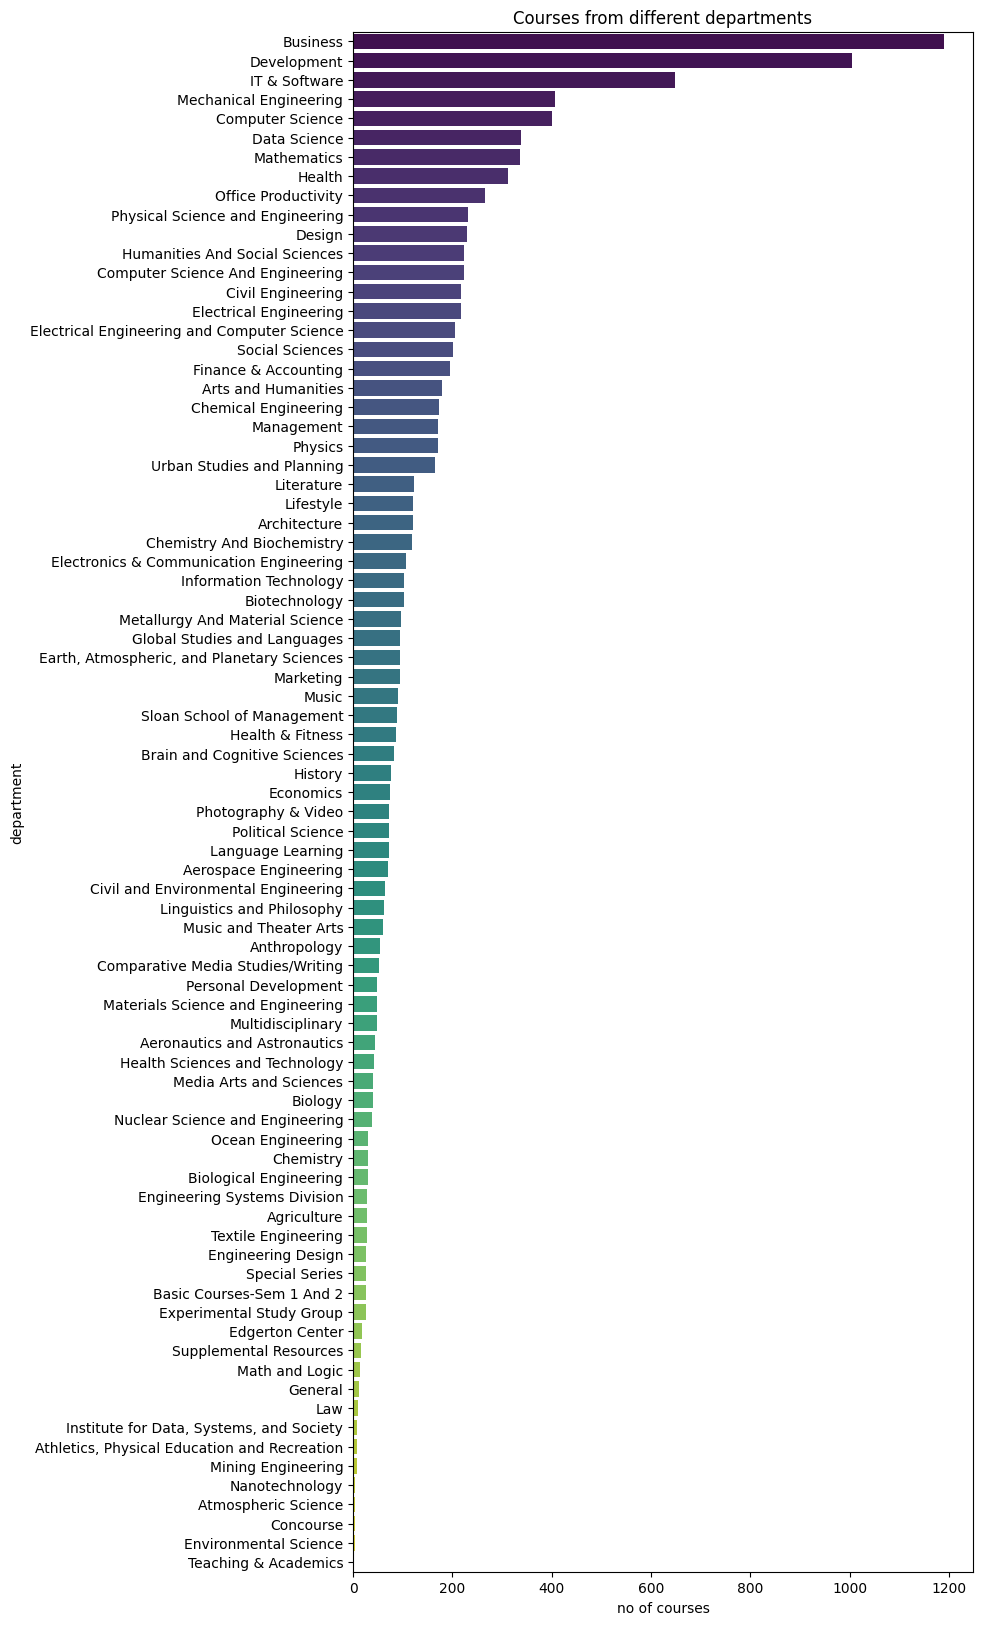

In [113]:
order=df['department'].value_counts().index
plt.figure(figsize=(8,20))
sns.countplot(data=df,y=df['department'],palette='viridis',order=order)
plt.title('Courses from different departments')
plt.xlabel('no of courses')
plt.show()

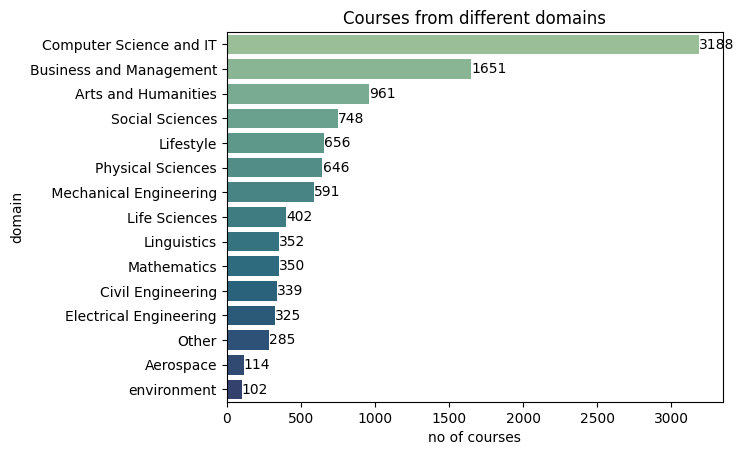

In [114]:
order=df['domain'].value_counts().index
ax=sns.countplot(data=df,y=df['domain'],palette='crest',order=order)
plt.title('Courses from different domains')
plt.xlabel('no of courses')
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.show()

## Modelling

now from the tags we need the unique words but we also want to preserve the order

In [115]:
def unique_words(text):
    seen = set()
    unique_words = [word for word in text.split() if word not in seen and not seen.add(word)]
    return ' '.join(unique_words)
df['unique']=df['tags'].apply(unique_words)
df

C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\739711221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique']=df['tags'].apply(unique_words)


,Course name,department,URL,tags,website,domain,unique
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,drama comedy peering screenwriting film d...,Coursera,Arts and Humanities,drama comedy peering screenwriting film docume...
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,finance business plan persona (user experien...,Coursera,Business and Management,finance business plan persona (user experience...
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,chemistry physics solar energy film lambda...,Coursera,Physical Sciences,chemistry physics solar energy film lambda cal...
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,accounts receivable dupont analysis analysis...,Coursera,Business and Management,accounts receivable dupont analysis accounting...
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera,Computer Science and IT,data analysis select (sql) database management...
...,...,...,...,...,...,...,...
10707,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,nptel,Social Sciences,as name suggests subject econometrics measure ...
10708,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,nptel,Social Sciences,designed guide frontier areas environmental ec...
10709,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,nptel,Social Sciences,purpose analytical framework analyzing spatial...
10710,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,nptel,Social Sciences,rapid innovation modern economy increased rate...


In [116]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [117]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def stem(text):
    words=word_tokenize(text)
    for i in range(len(words)):
        words[i]=stemmer.stem(words[i])
        words[i]=lemmatizer.lemmatize(words[i])
    return ' '.join(words)
df['keywords']=df['unique'].apply(stem)
df

C:\Users\eashw\AppData\Local\Temp\ipykernel_115248\2170382689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords']=df['unique'].apply(stem)


,Course name,department,URL,tags,website,domain,unique,keywords
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,drama comedy peering screenwriting film d...,Coursera,Arts and Humanities,drama comedy peering screenwriting film docume...,drama comedi peer screenwrit film document rev...
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,finance business plan persona (user experien...,Coursera,Business and Management,finance business plan persona (user experience...,financ busi plan persona ( user experi ) model...
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,chemistry physics solar energy film lambda...,Coursera,Physical Sciences,chemistry physics solar energy film lambda cal...,chemistri physic solar energi film lambda calc...
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,accounts receivable dupont analysis analysis...,Coursera,Business and Management,accounts receivable dupont analysis accounting...,account receiv dupont analysi account financ o...
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera,Computer Science and IT,data analysis select (sql) database management...,data analysi select ( sql ) databas manag syst...
...,...,...,...,...,...,...,...,...
10707,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,as name suggests subject econometrics measure ...,nptel,Social Sciences,as name suggests subject econometrics measure ...,a name suggest subject econometr measur econom...
10708,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,designed guide frontier areas environmental ec...,nptel,Social Sciences,designed guide frontier areas environmental ec...,design guid frontier area environment econom b...
10709,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,purpose analytical framework analyzing spatial...,nptel,Social Sciences,purpose analytical framework analyzing spatial...,purpos analyt framework analyz spatial data ta...
10710,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,rapid innovation modern economy increased rate...,nptel,Social Sciences,rapid innovation modern economy increased rate...,rapid innov modern economi increas rate produc...


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize


In [119]:
def recommend(course):
    course_domain = df[df['Course name'] == course]['domain'].iloc[0]
    course_df=df[df['domain']==course_domain].reset_index()
    course_index=course_df[course_df['Course name'] == course].index[0]
    
    
    
    cv=CountVectorizer(max_features=10000, stop_words='english')
    vectors=cv.fit_transform(course_df['keywords']).toarray()
    vectors_normalized = normalize(vectors)
    
    similarity=cosine_similarity([vectors_normalized[course_index]],vectors_normalized)
    distances=similarity[0]
    
    course_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    for i in course_list:
        print(course_df['Course name'][i[0]])
    
    
    

We first see which domain the given course belongs to and create a separate dataframe(course_df) of only the courses in that domain. Then we convert the keywords of all the courses in course_df to an array of length 10000 and then normalize it to nullify the impact of the length of text in keywords column of a course. We calculate the similarity between the course and all other courses in the course_df. That's it now we that we have the similarity between the courses wee recommend the courses with the most similarity

In [120]:
course='JavaScript Strings: Properties and Methods'
course_domain = df[df['Course name'] == course]['domain'].iloc[0]
course_df=df[df['domain']==course_domain].reset_index(drop=True)
course_index=course_df[course_df['Course name'] == course].index[0]
course_df

,Course name,department,URL,tags,website,domain,unique,keywords
0,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,data analysis select (sql) database manageme...,Coursera,Computer Science and IT,data analysis select (sql) database management...,data analysi select ( sql ) databas manag syst...
1,Building Test Automation Framework using Selen...,Computer Science,https://www.coursera.org/learn/building-test-a...,maintenance test case test automation scree...,Coursera,Computer Science and IT,maintenance test case automation screenshot pr...,mainten test case autom screenshot project hel...
2,"Programming Languages, Part A",Computer Science,https://www.coursera.org/learn/programming-lan...,inference ml (programming language) higher-o...,Coursera,Computer Science and IT,inference ml (programming language) higher-ord...,infer ml ( program languag ) higher-ord functi...
3,Business Statistics and Analysis Capstone,Data Science,https://www.coursera.org/learn/business-statis...,statistical analysis microsoft excel busines...,Coursera,Computer Science and IT,statistical analysis microsoft excel business ...,statist analysi microsoft excel busi analyt re...
4,Python Programming Essentials,Computer Science,https://www.coursera.org/learn/python-programming,semantics python programming coding conventi...,Coursera,Computer Science and IT,semantics python programming coding convention...,semant python program code convent codeskulpto...
...,...,...,...,...,...,...,...,...
3183,Principles Of Compiler Design,Computer Science And Engineering,https://nptel.ac.in/courses/106108113,an compiler lexical analysis syntax analysis s...,nptel,Computer Science and IT,an compiler lexical analysis syntax semantic i...,an compil lexic analysi syntax semant intermed...
3184,NOC:Discrete Mathematics _ IIITB,Computer Science And Engineering,https://nptel.ac.in/courses/106108227,discrete mathematics study mathematical struct...,nptel,Computer Science and IT,discrete mathematics study mathematical struct...,discret mathemat studi mathemat structur sen a...
3185,NOC:Secure Computation: Part I,Computer Science And Engineering,https://nptel.ac.in/courses/106108229,various cryptographic primitives computation d...,nptel,Computer Science and IT,various cryptographic primitives computation d...,variou cryptograph primit comput distribut sen...
3186,NOC:Secure Computation: Part II,Computer Science And Engineering,https://nptel.ac.in/courses/106108237,secure multiparty computation mpc fundamental ...,nptel,Computer Science and IT,secure multiparty computation mpc fundamental ...,secur multiparti comput mpc fundament cryptogr...


In [121]:
cv=CountVectorizer(max_features=10000, stop_words='english')
vectors=cv.fit_transform(course_df['keywords']).toarray()
vectors_normalized = normalize(vectors)

similarity=cosine_similarity([vectors_normalized[course_index]],vectors_normalized)
distances=similarity[0]
distances


array([0.19069252, 0.10360427, 0.08616404, ..., 0.07067535, 0.08867022,
       0.01079584])

In [122]:
courses_list=sorted(list(enumerate(distances)),key=lambda x:x[1],reverse=True)[1:10]
courses_list

[(405, 0.6115766297251508),
 (414, 0.5801925340982739),
 (729, 0.45784895811741),
 (63, 0.4251454611090235),
 (712, 0.424705992864688),
 (818, 0.4103274517792908),
 (269, 0.3995274658716624),
 (171, 0.3953189298238276),
 (235, 0.3862027218610471)]

In [123]:
for i in courses_list:
    print(course_df['Course name'][i[0]])

JavaScript Numbers: Properties and Methods
JavaScript Variables and Assignment Operators
Style Tables with CSS
Images and Links in HTML
Introduction to JavaScript
Style Images with CSS
Tables and Forms in HTML
Getting Started with Blazor WASM
Position Elements on a Page with CSS


Lets see the implementation on some courses

In [124]:
recommend('Control of Manufacturing Processes (SMA 6303)')

Design For Manufacturing
NOC:Introduction To Crystal Elasticity And Crystal Plasticity
NOC:Mathematical Modeling Of Manufacturing Processes
Electronic and Mechanical Properties of Materials
Mechanics of Materials
Polymer Engineering
Maneuvering and Control of Surface and Underwater Vehicles (13.49)
Signal Processing: Continuous and Discrete
Modeling and Simulation of Dynamic Systems


In [125]:
recommend('Classification Trees in Python, From Start To Finish')

Support Vector Machines in Python, From Start to Finish
Image Classification with CNNs using Keras
Creating Custom Callbacks in Keras
Computer Vision - Image Basics with OpenCV and Python
Perform Sentiment Analysis with scikit-learn
Siamese Network with Triplet Loss in Keras
Neural Style Transfer with TensorFlow
Build Multilayer Perceptron Models with Keras
Create Custom Layers in Keras


In [126]:
recommend('Relationship Management in Corporate Banking')

Banking Credit Analysis Process (for Bankers)
Become a Top Banker with Complete Retail Banking Training
MBA in a Box: Business Lessons from a CEO
NOC:Management Of Commercial Banking
Pass the Exam: CompTIA Project+ PK0-004
PMP Exam Prep Seminar - Complete Exam Coverage with 35 PDUs
Learn and Master the Basics of Finance
Digital Marketing Agency | Start a Social Media Business
Digital Product Management: Modern Fundamentals


In [131]:
df.columns

Index(['Course name', 'department', 'URL', 'tags', 'website', 'domain',
       'unique', 'keywords'],
      dtype='object')

In [132]:
df=df[['Course name', 'department', 'URL','website', 'domain','keywords']]
df

,Course name,department,URL,website,domain,keywords
0,Write A Feature Length Screenplay For Film Or ...,Arts and Humanities,https://www.coursera.org/learn/write-a-feature...,Coursera,Arts and Humanities,drama comedi peer screenwrit film document rev...
1,Business Strategy: Business Model Canvas Analy...,Business,https://www.coursera.org/learn/canvas-analysis...,Coursera,Business and Management,financ busi plan persona ( user experi ) model...
2,Silicon Thin Film Solar Cells,Physical Science and Engineering,https://www.coursera.org/learn/silicon-thin-fi...,Coursera,Physical Sciences,chemistri physic solar energi film lambda calc...
3,Finance for Managers,Business,https://www.coursera.org/learn/operational-fin...,Coursera,Business and Management,account receiv dupont analysi account financ o...
4,Retrieve Data using Single-Table SQL Queries,Information Technology,https://www.coursera.org/learn/single-table-sq...,Coursera,Computer Science and IT,data analysi select ( sql ) databas manag syst...
...,...,...,...,...,...,...
10707,NOC:Introduction To Econometrics,Economics,https://nptel.ac.in/courses/130106001,nptel,Social Sciences,a name suggest subject econometr measur econom...
10708,NOC:Environmental & Resource Economics,Economics,https://nptel.ac.in/courses/130106113,nptel,Social Sciences,design guid frontier area environment econom b...
10709,NOC:Spatial Statistics And Spatial Econometrics,Economics,https://nptel.ac.in/courses/130106115,nptel,Social Sciences,purpos analyt framework analyz spatial data ta...
10710,NOC:Economics Of Innovation,Economics,https://nptel.ac.in/courses/130106117,nptel,Social Sciences,rapid innov modern economi increas rate produc...


In [136]:
file_path="C:/Users/eashw/OneDrive/Desktop/project/dataset.csv"
df.to_csv(file_path,index=False)